# Notebook to plot cumulative effects comparison

This notebook shows Figure 5

In [1]:
import seaborn as sns

%matplotlib inline
sns.set(context='paper', font='Fira Sans Extra Condensed', style='ticks', palette='Accent', font_scale=1.2)
%config InlineBackend.figure_format = 'retina'

import matplotlib
matplotlib.font_manager._rebuild()

In [2]:
import matplotlib.pyplot as plt
from pandas import read_csv

In [3]:
path_to_results = 'results/'

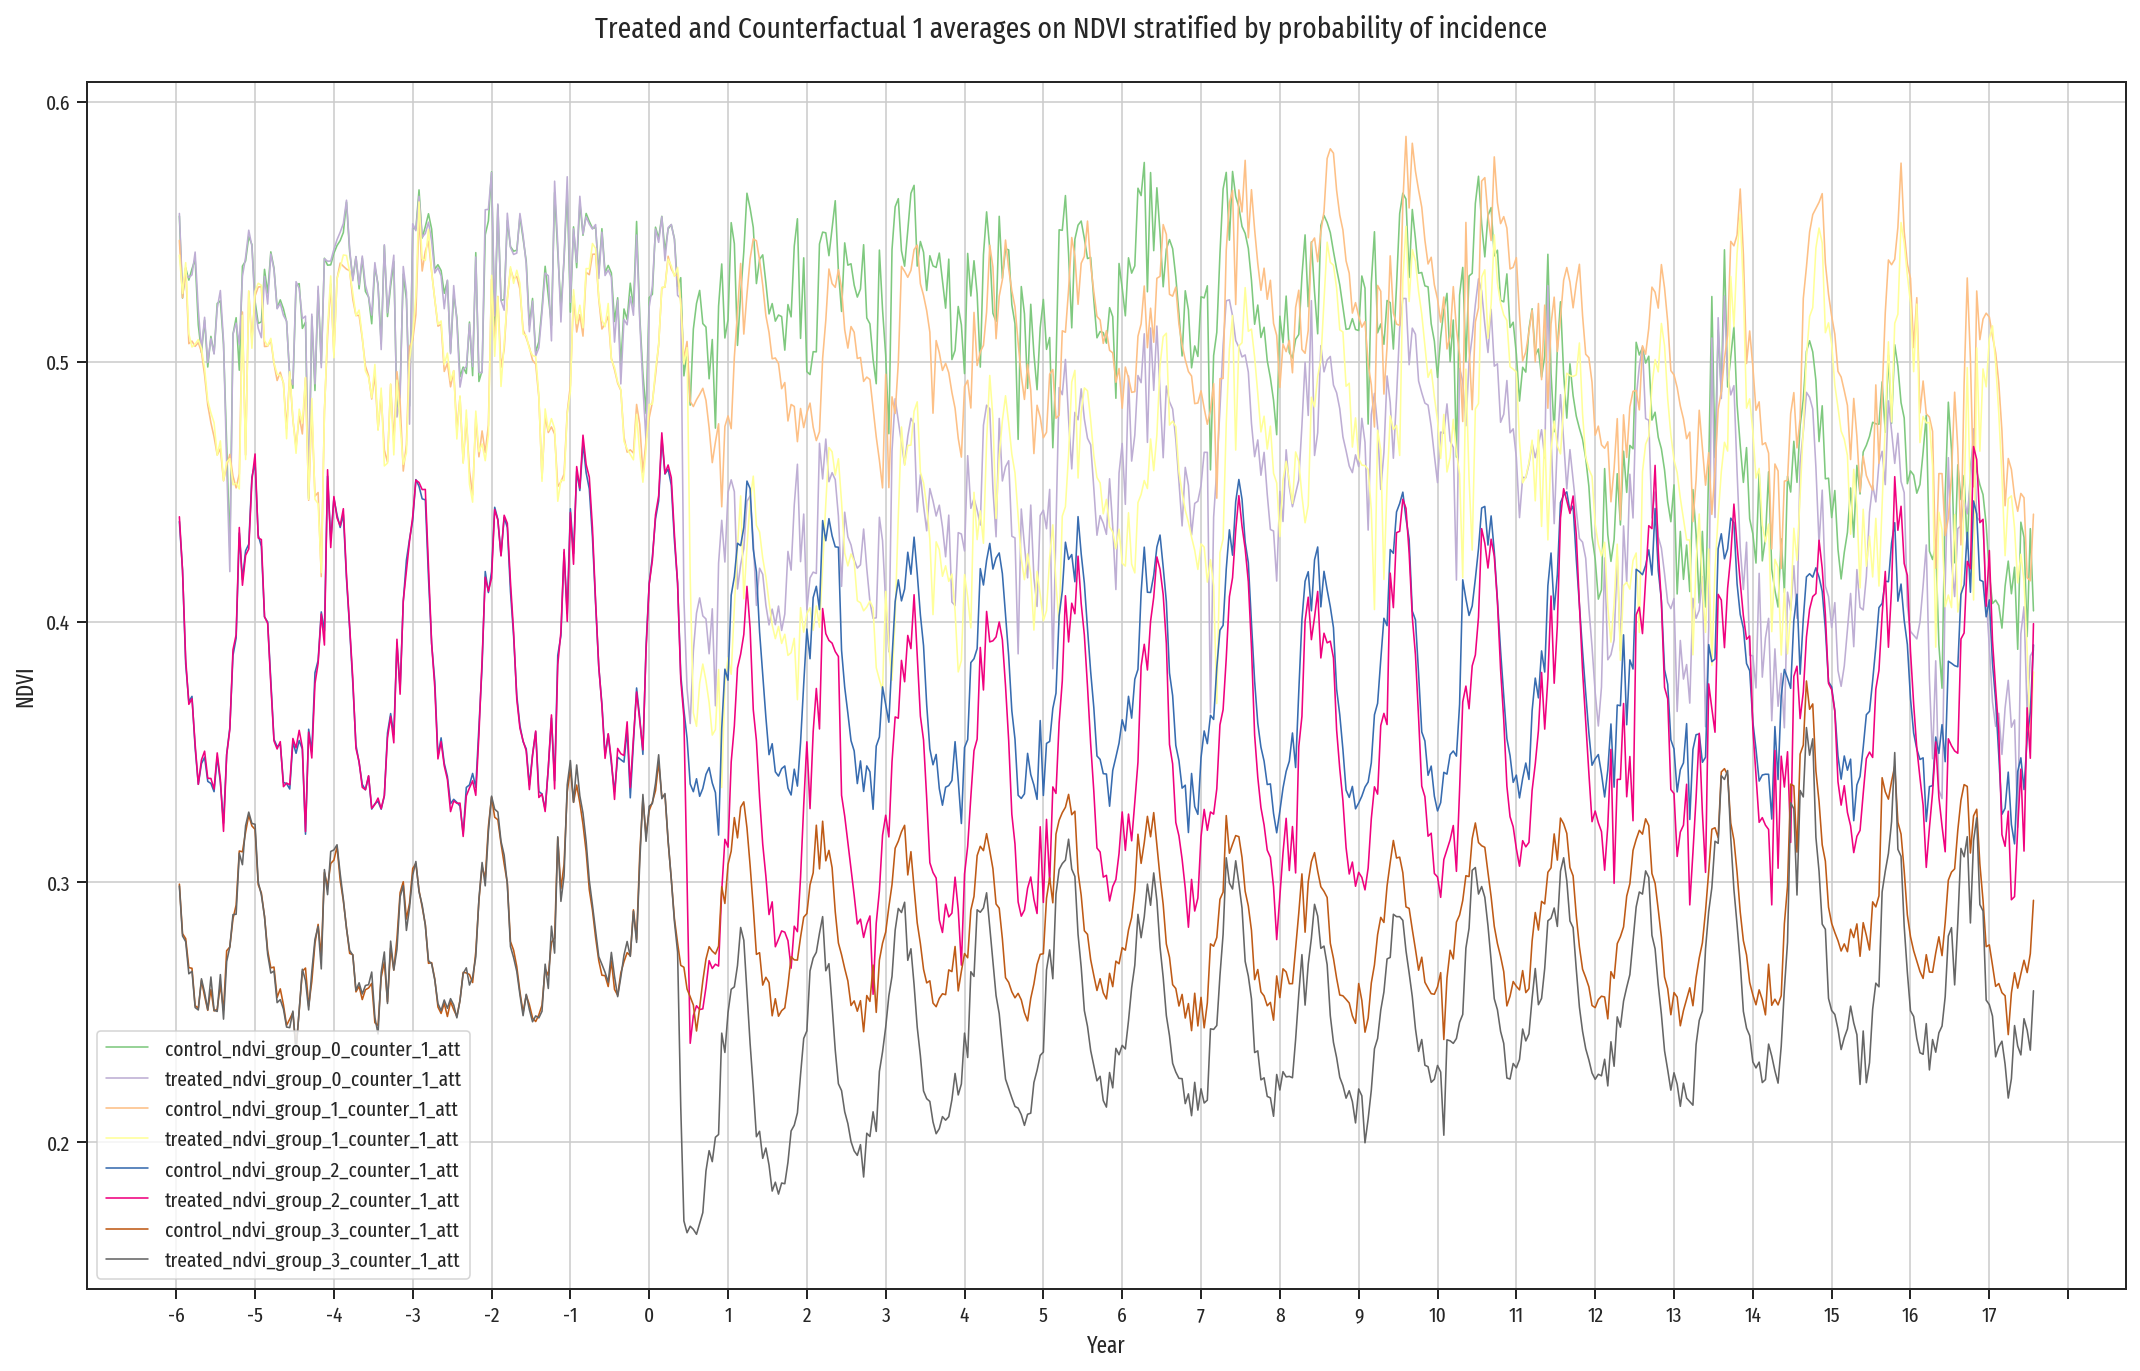

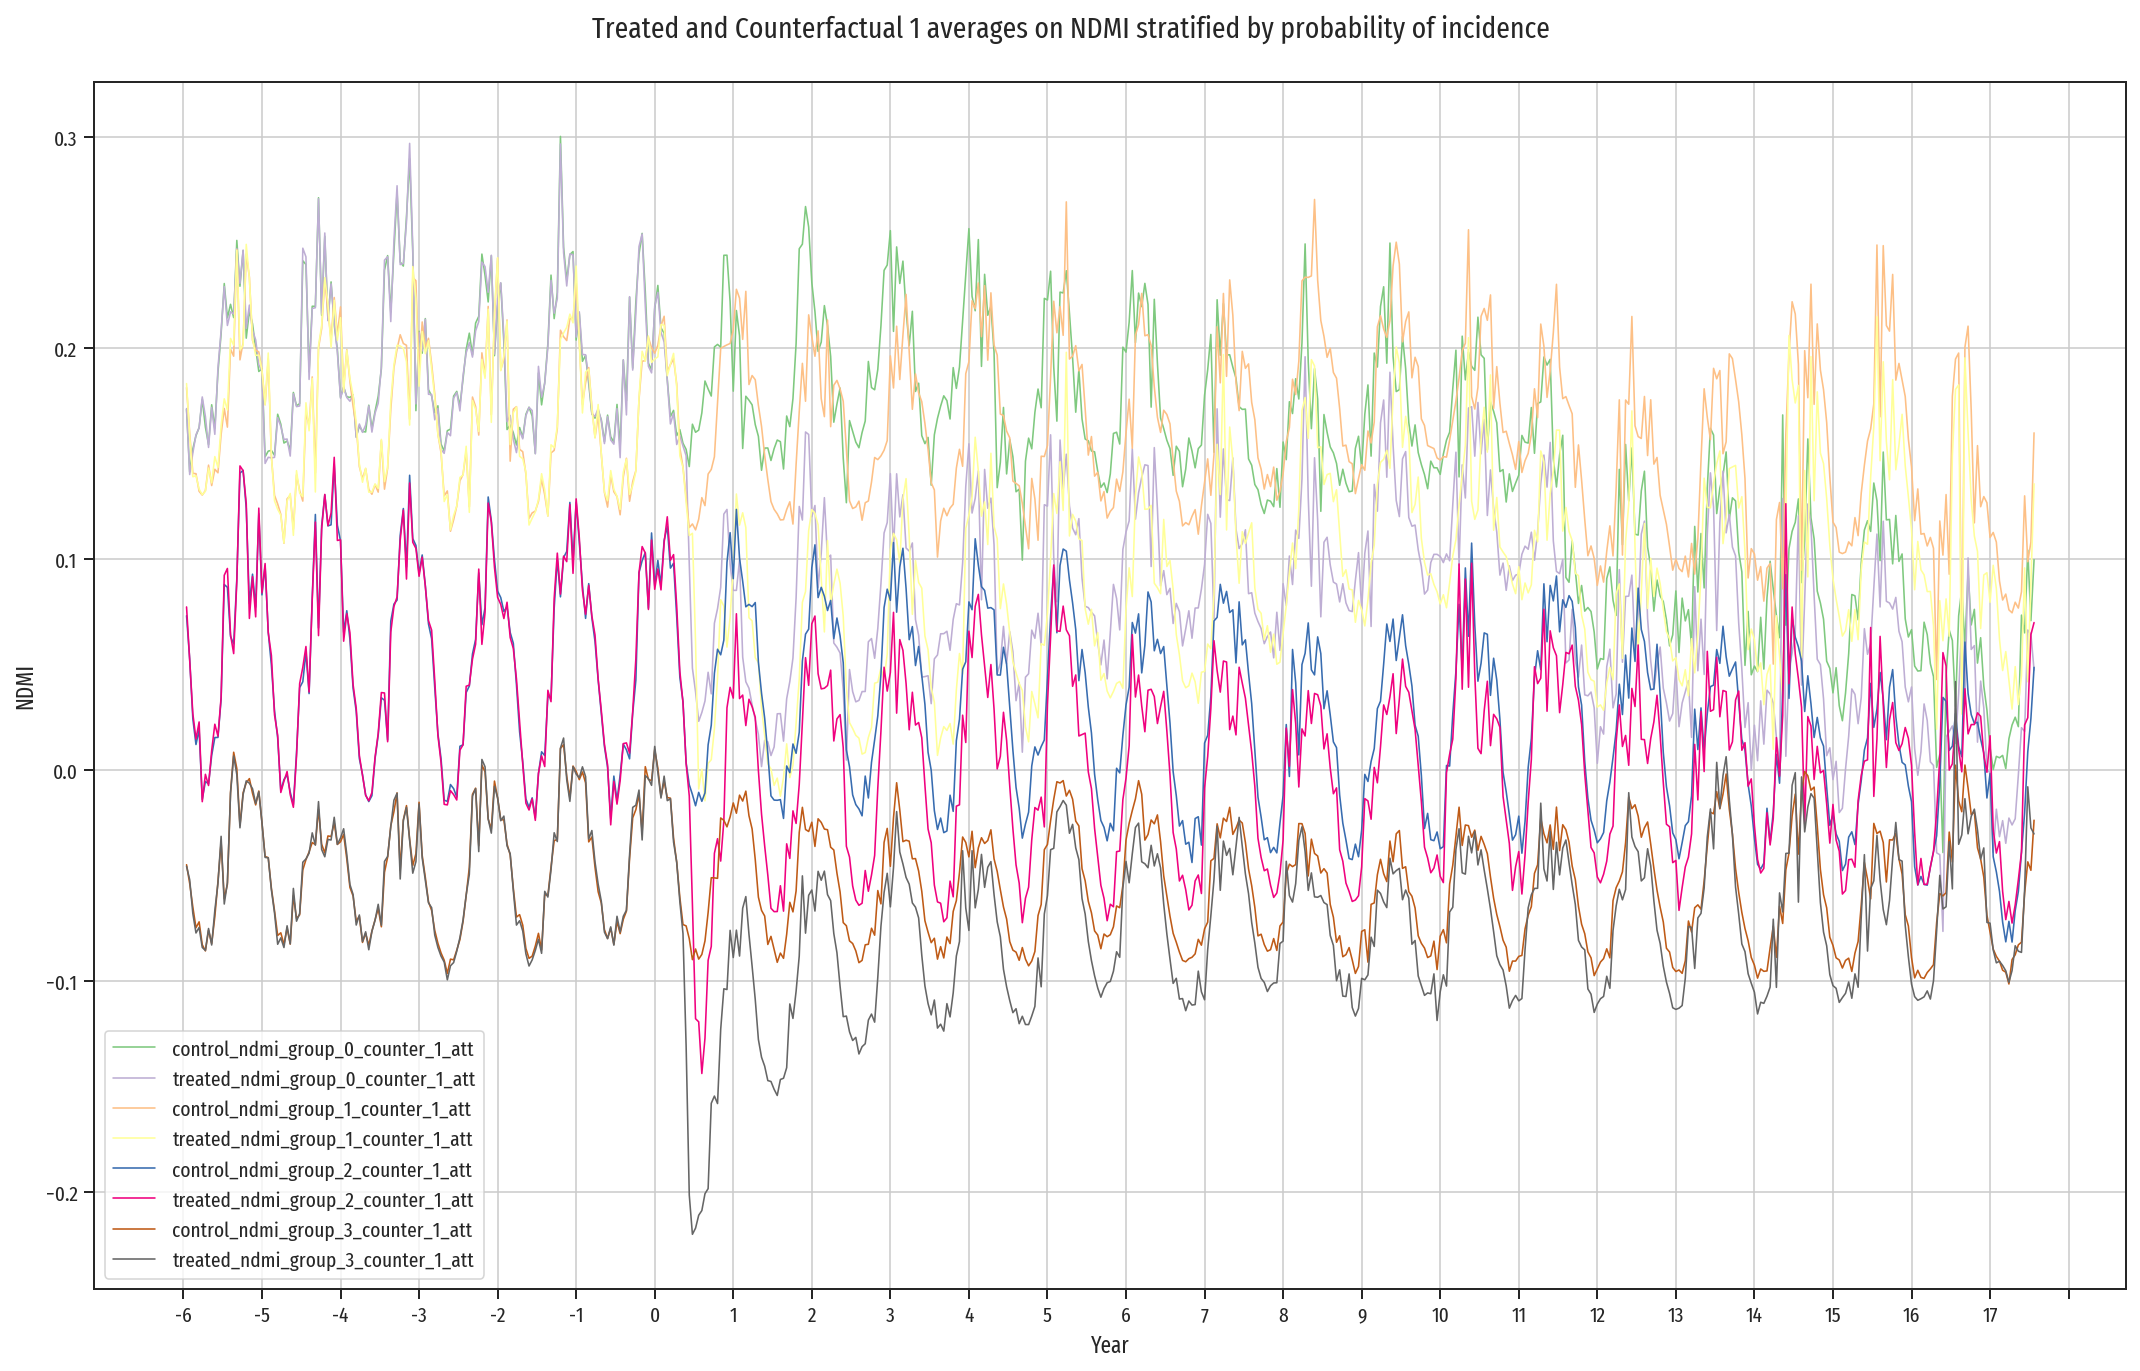

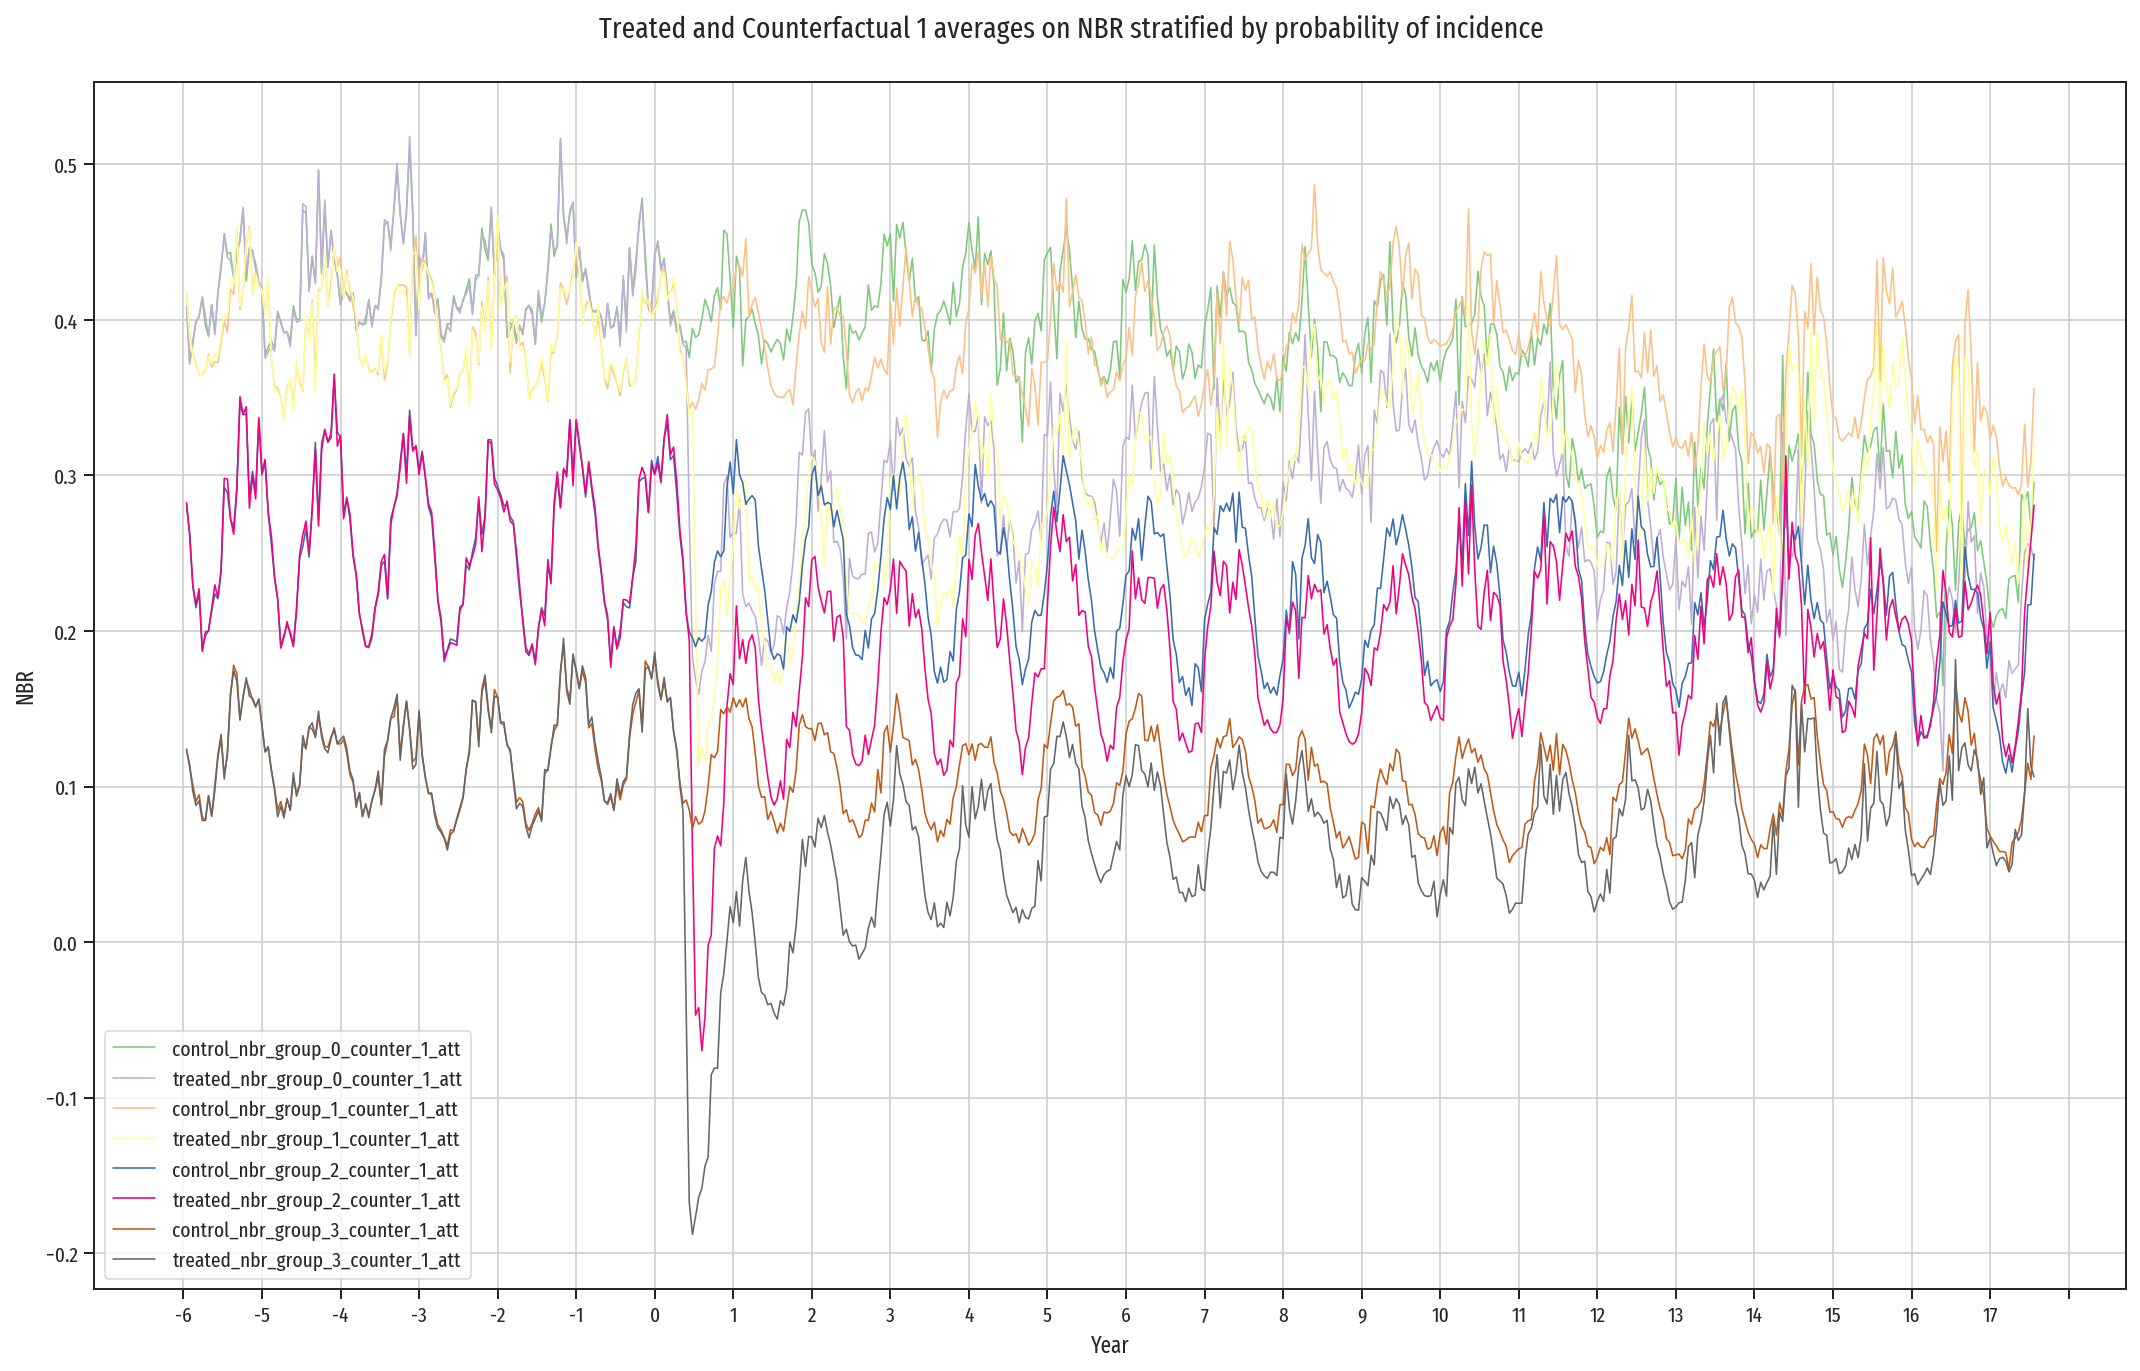

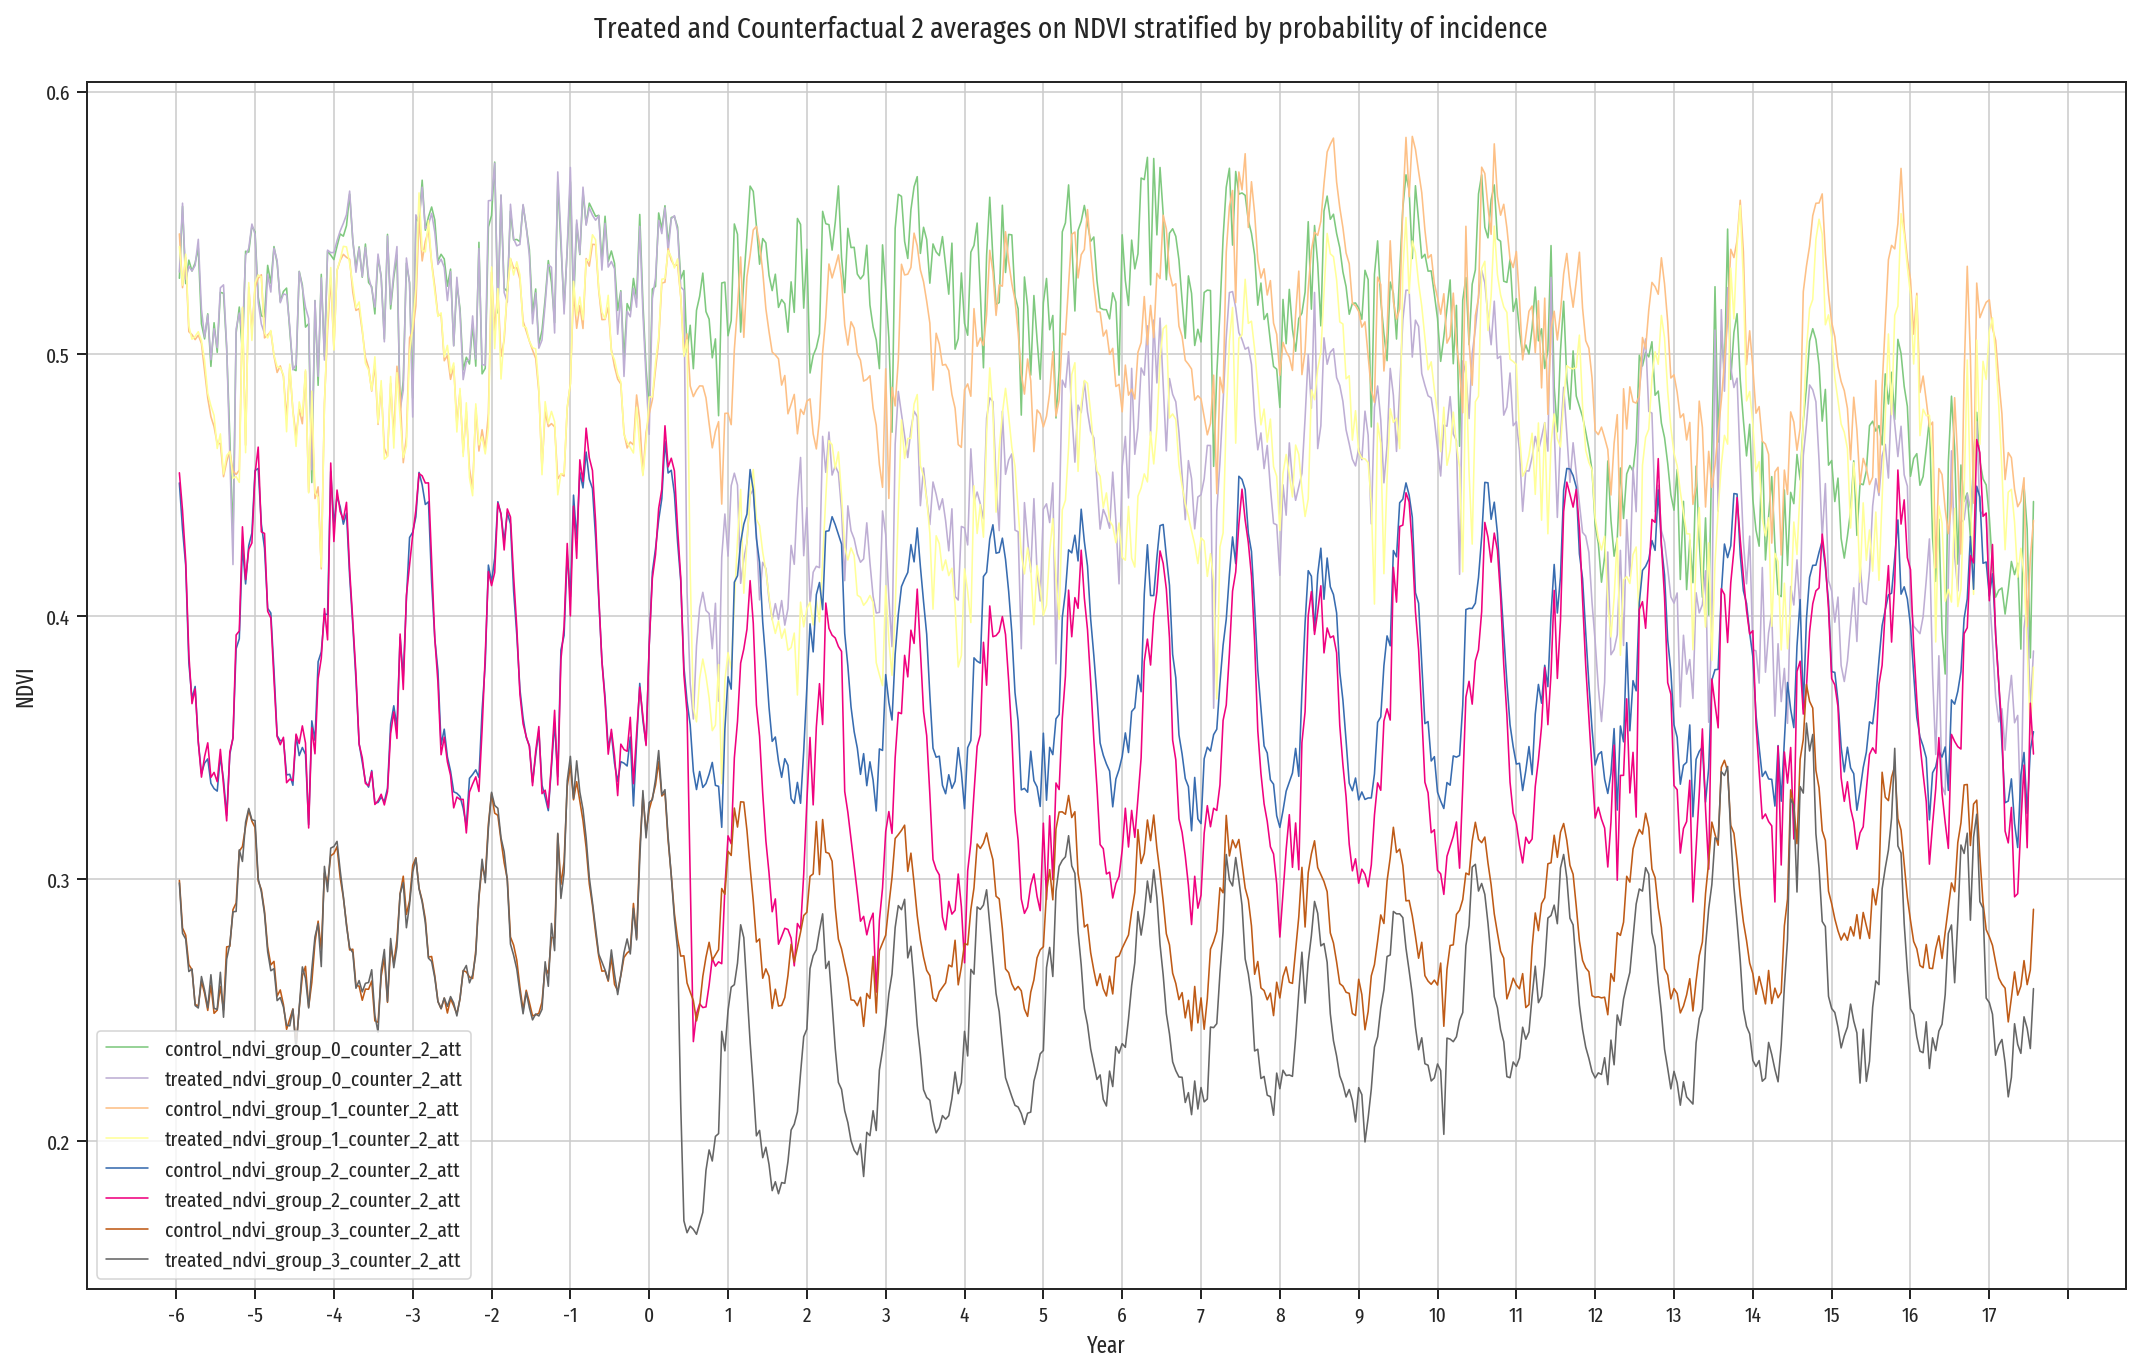

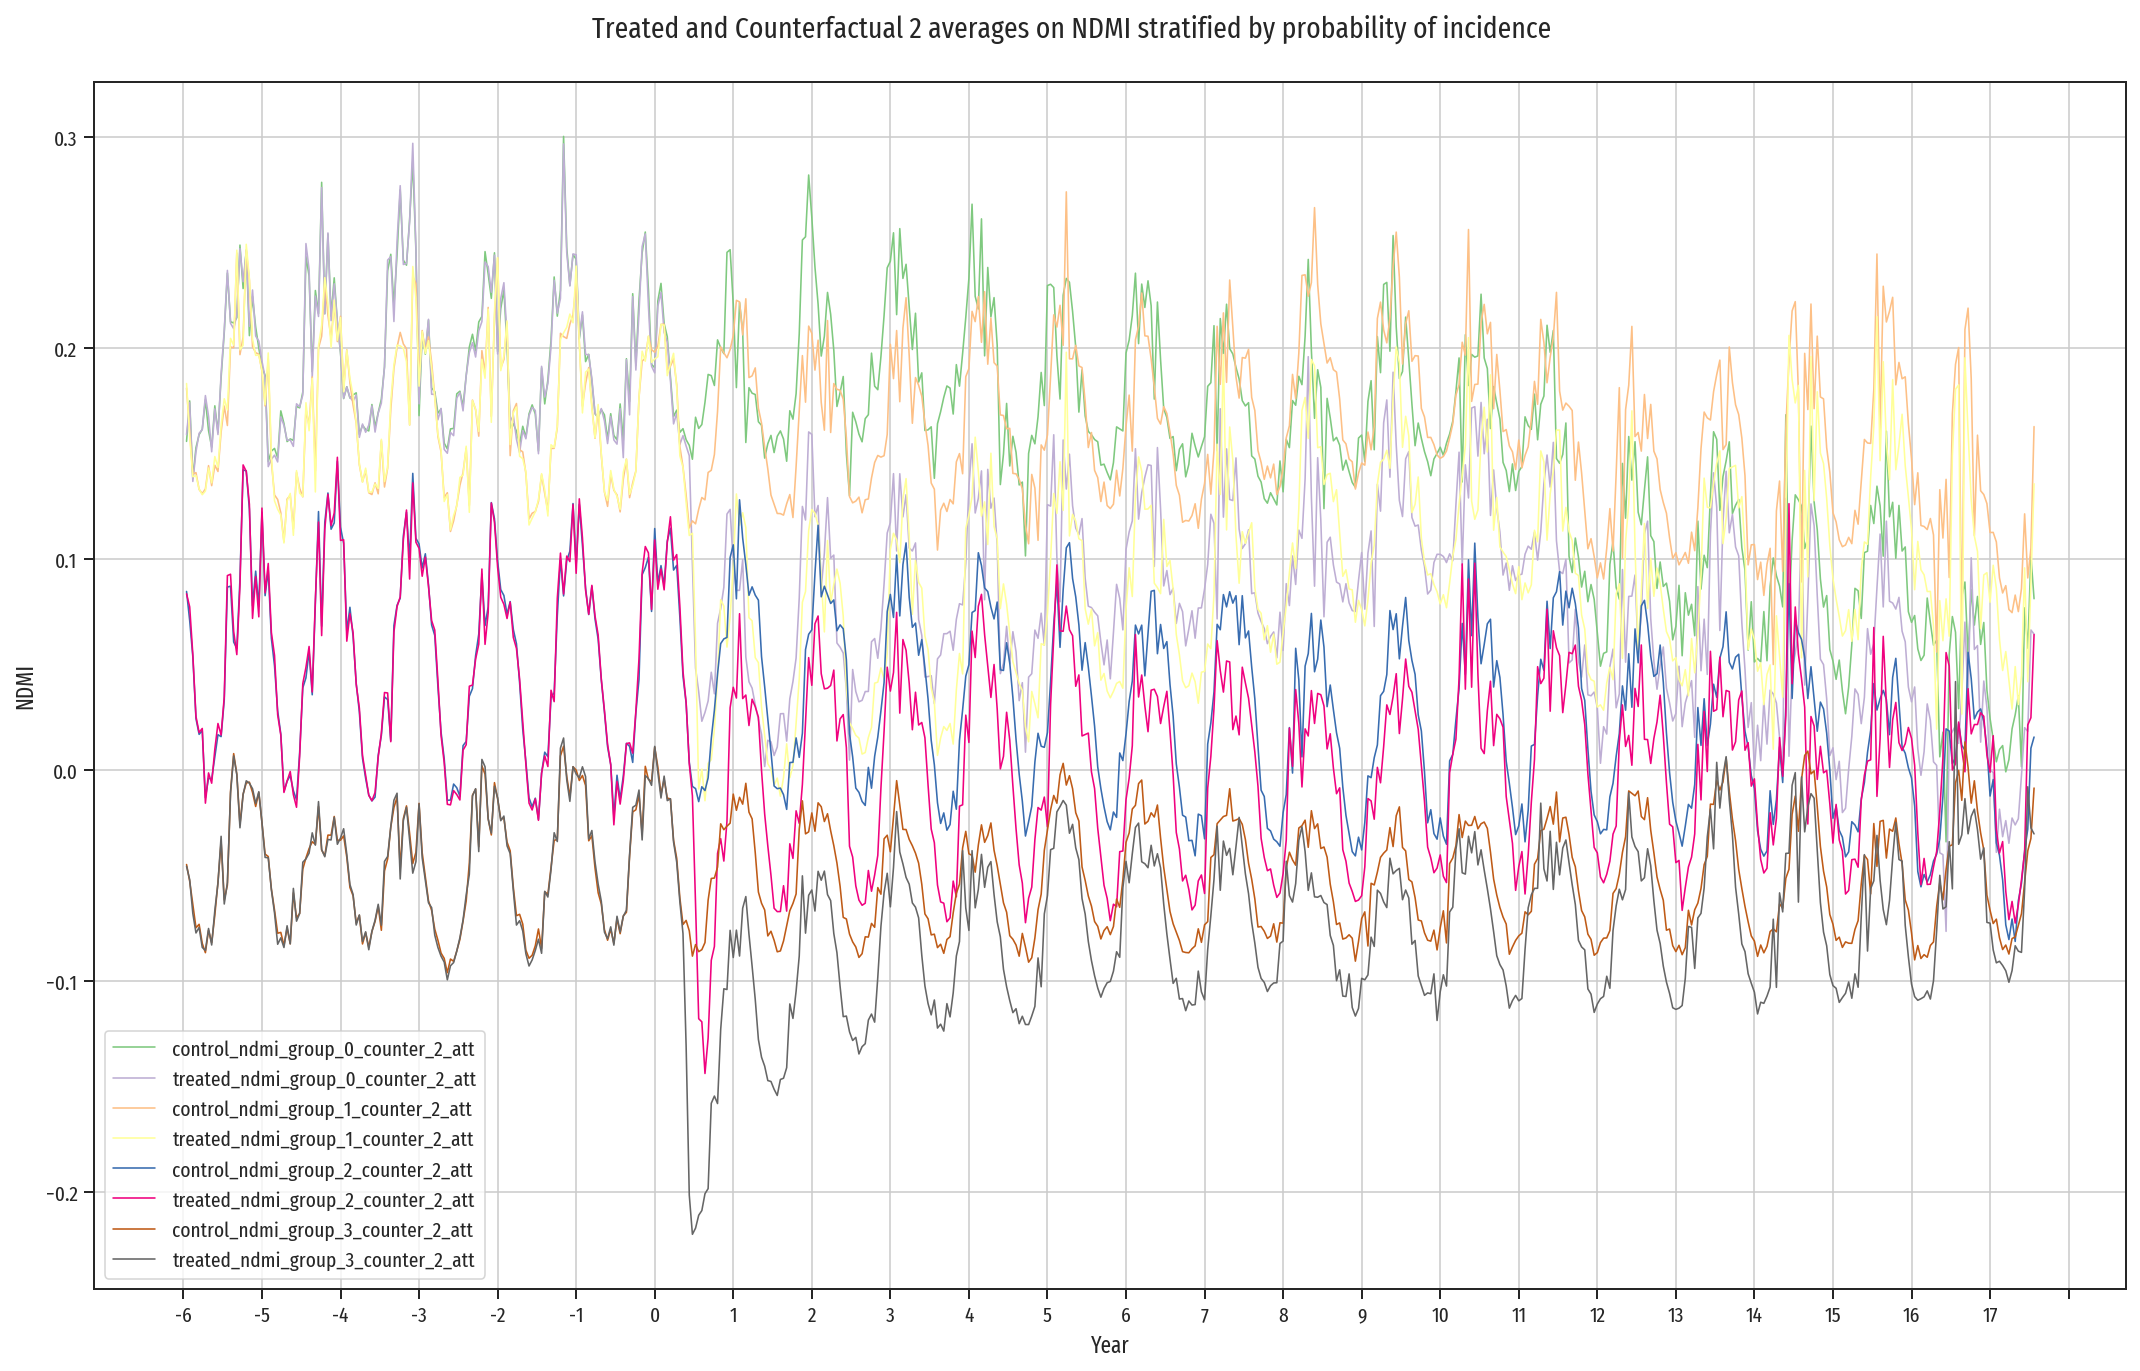

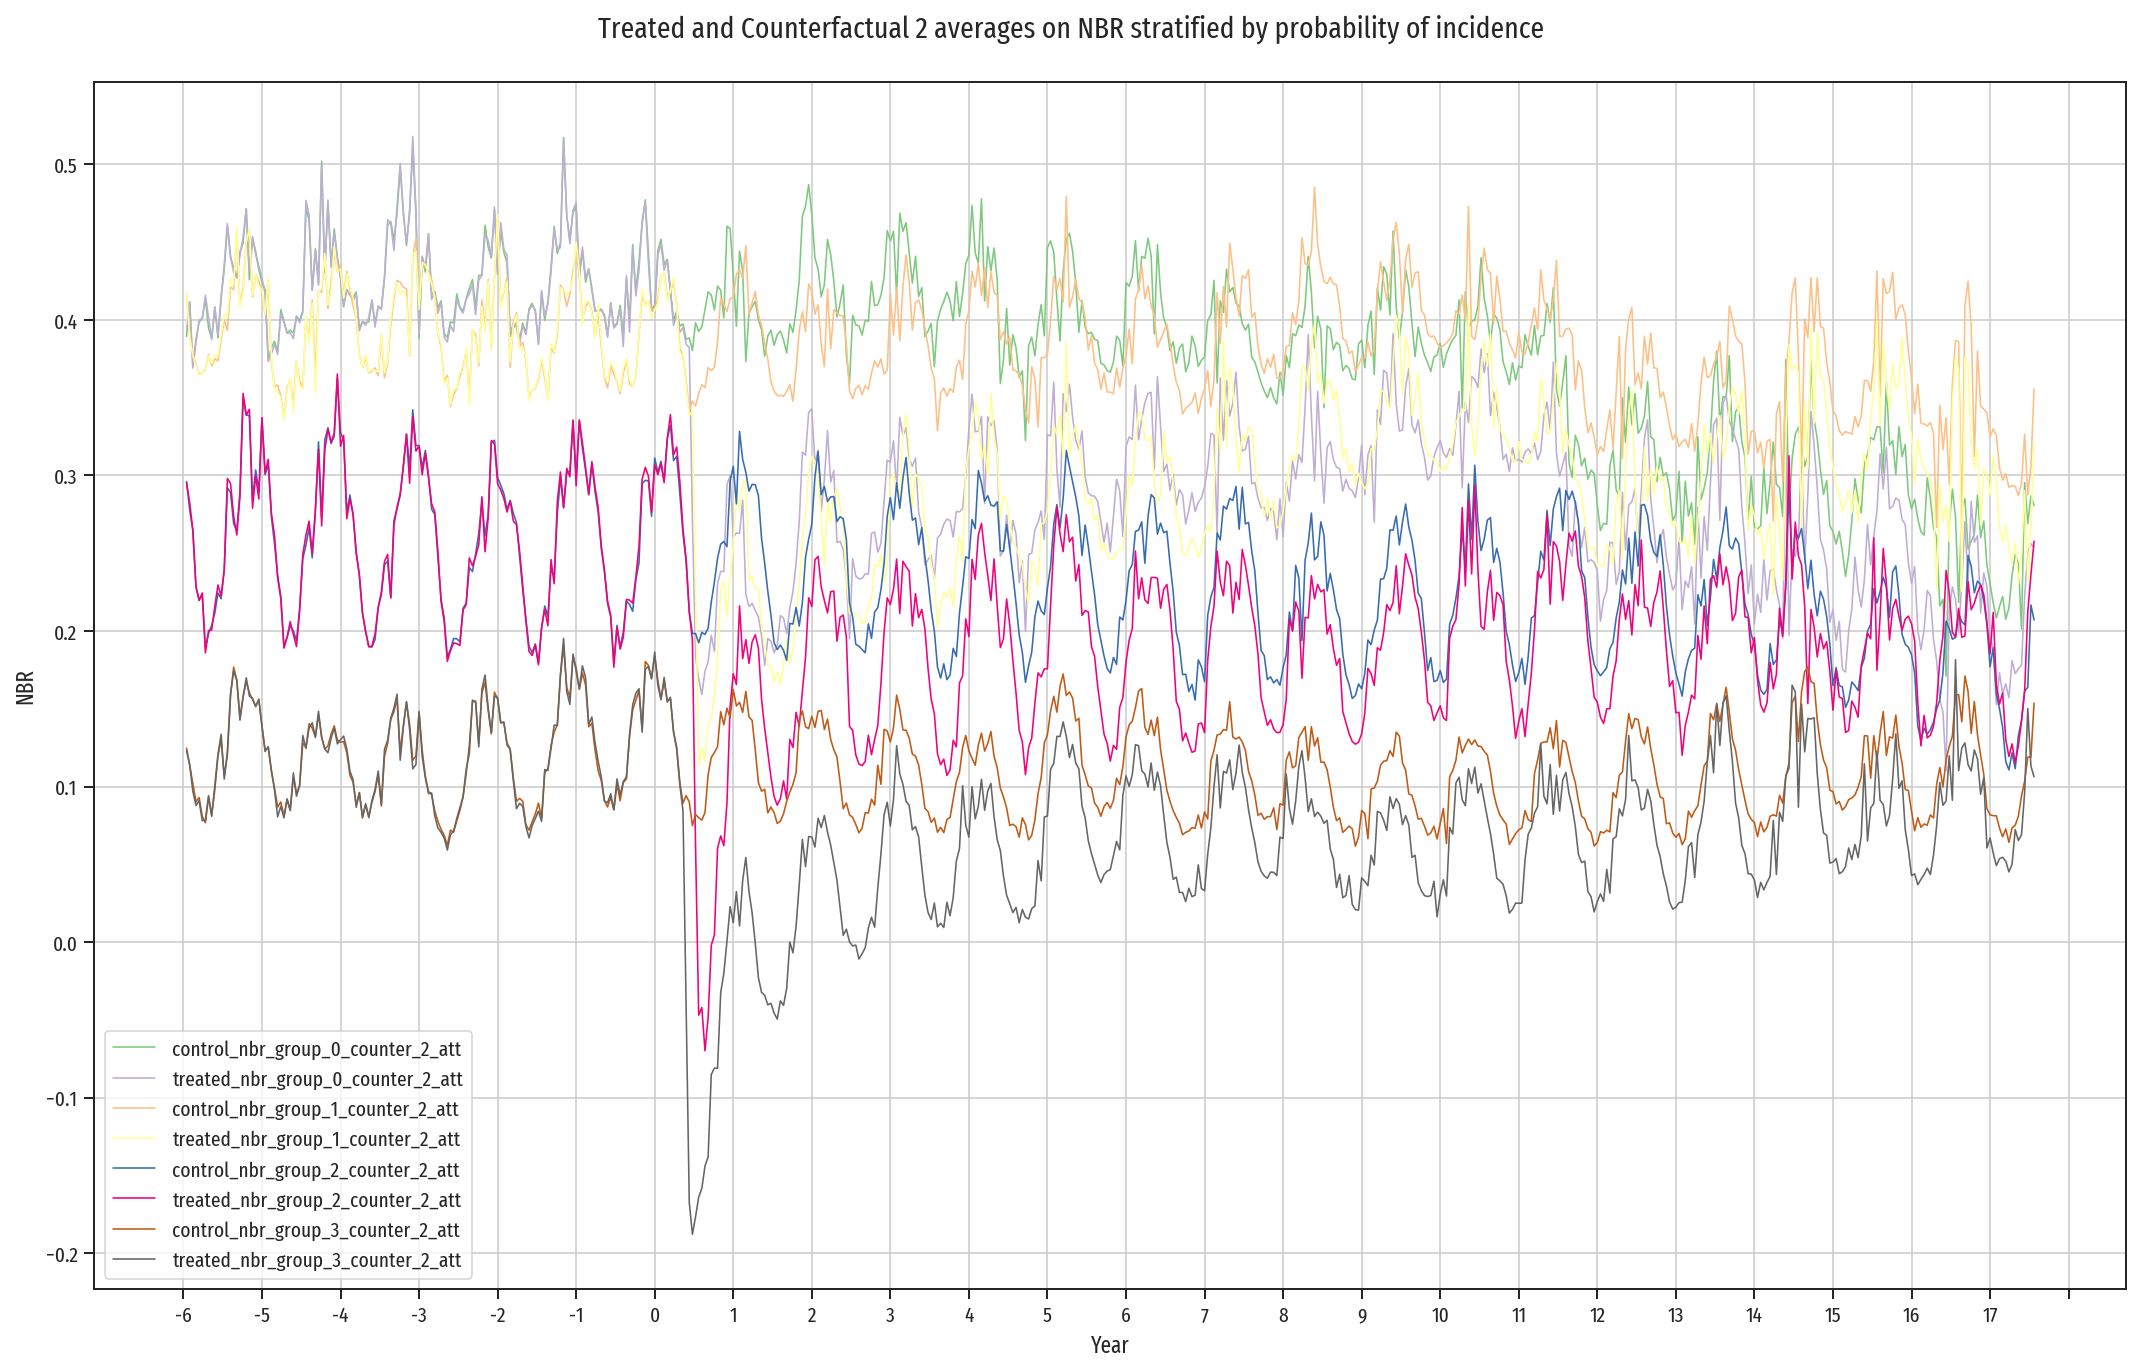

In [4]:
df_averages_gsynth = read_csv('results/gsynth_results/postprocessed_data_averages_gsynth.csv', index_col=1)

outcomes = ['ndvi','ndmi', 'nbr']
for counterfactual_ in range(1, 3):
    for outcome_ in outcomes:
        fig, ax = plt.subplots(figsize=(15, 10))
        for i in range(4):
            df_averages_gsynth[['control_{}_group_{}_counter_{}_att'.format(outcome_, i, counterfactual_), 
                                'treated_{}_group_{}_counter_{}_att'.format(outcome_, i, counterfactual_)]].plot(ax=ax,grid=True, linewidth=.8)

            plt.xlabel('time')
            plt.ylabel('{}'.format(outcome_.upper()))
            plt.xlabel('Year')
            plt.xticks([i for i in range(0, 601, 25)], ['{}'.format(i) for i in range(-6, 18)])
            plt.suptitle('Treated and Counterfactual {} averages on {} stratified by probability of incidence'.format(counterfactual_, outcome_.upper()), size=15)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


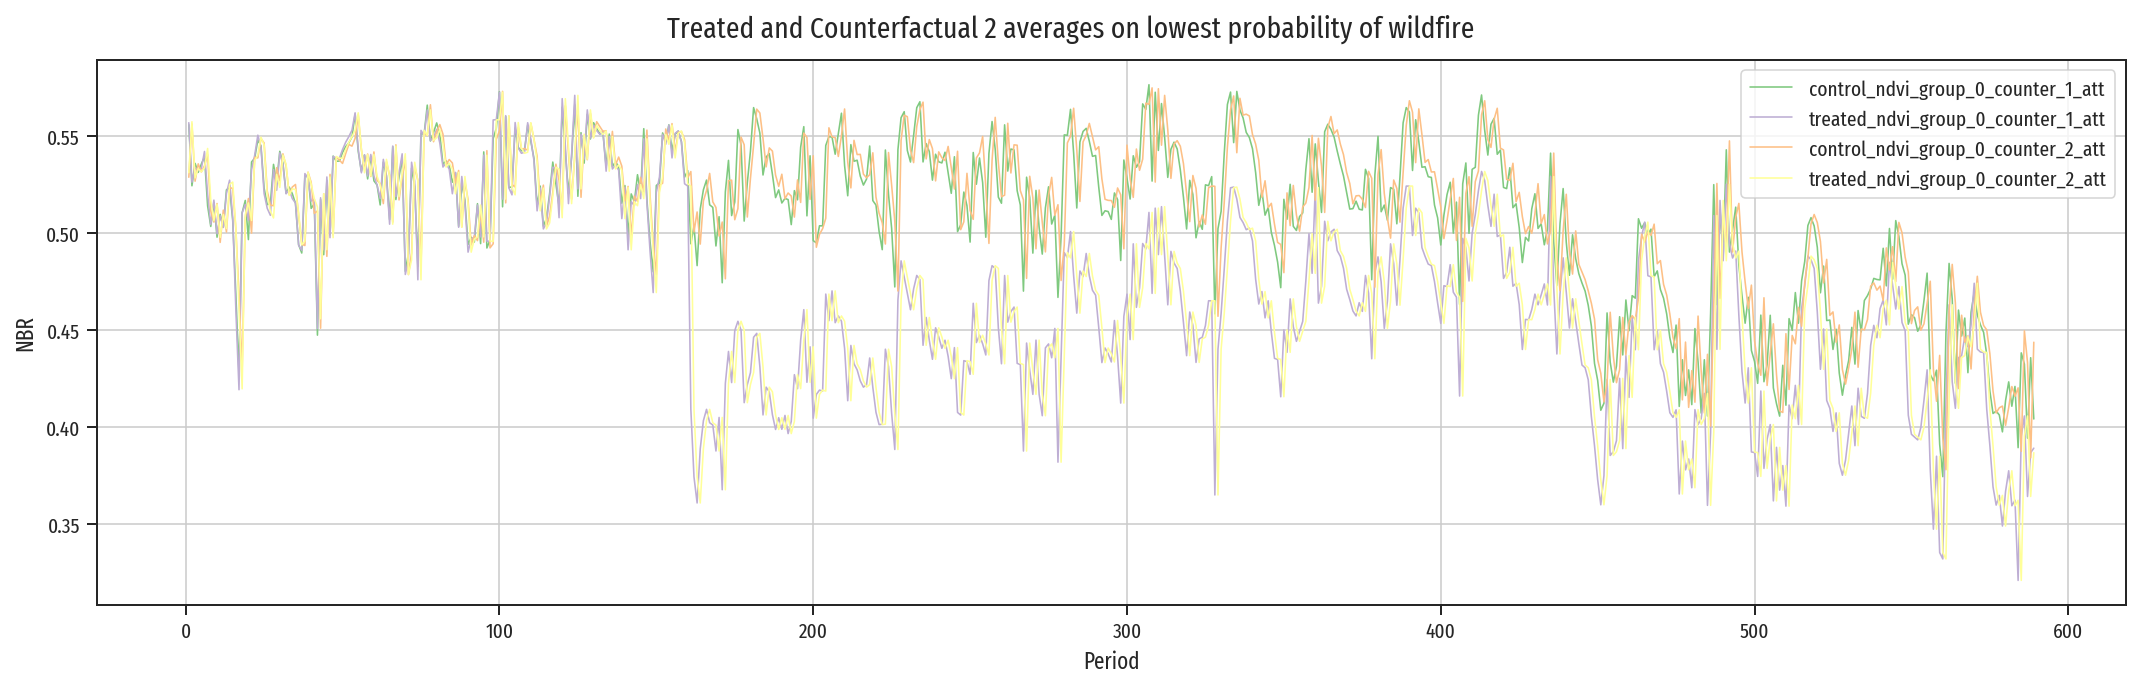

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
for i in range(1, 3):
    df_averages_gsynth[['control_ndvi_group_0_counter_{}_att'.format(i), 
                        'treated_ndvi_group_0_counter_{}_att'.format(i)]].plot(ax=ax,grid=True, linewidth=.8)

    plt.xlabel('time')
    plt.ylabel('{}'.format(outcome_.upper()))
    plt.xlabel('Period')
    plt.suptitle('Treated and Counterfactual {} averages on lowest probability of wildfire'.format(i, 'NDVI'), size=15)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


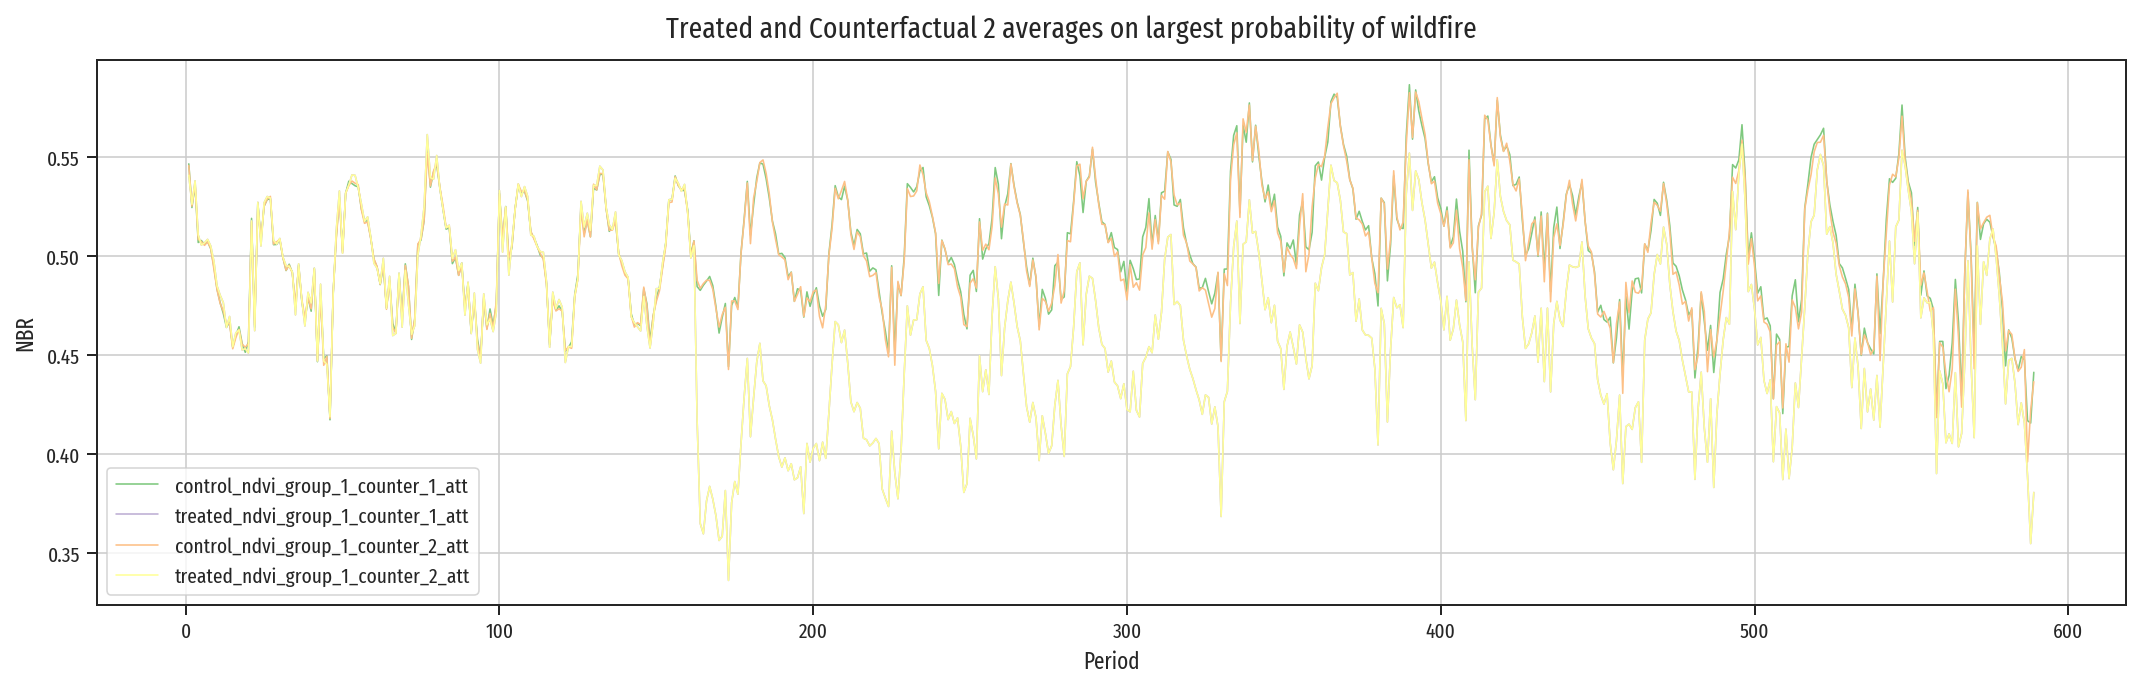

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
for i in range(1, 3):
    df_averages_gsynth[['control_ndvi_group_1_counter_{}_att'.format(i), 
                        'treated_ndvi_group_1_counter_{}_att'.format(i)]].plot(ax=ax,grid=True, linewidth=.8)

    plt.xlabel('time')
    plt.ylabel('{}'.format(outcome_.upper()))
    plt.xlabel('Period')
    plt.suptitle('Treated and Counterfactual {} averages on largest probability of wildfire'.format(i, 'NDVI'), size=15)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




In [7]:
from pandas import read_csv

df_time_gsynth = read_csv('results/gsynth_results/postprocessed_data_time_gsynth.csv', index_col=1)
df_time_gsynth = df_time_gsynth.drop(columns=['Unnamed: 0'])

df_time_gsynth

variable_ndvi_time_<380_cum_att  variable_ndvi_time_<380_cum_SE  \
X1.379                                                                    
1                             -0.004781                        0.000755   
2                             -0.075843                        0.008303   
3                             -0.170523                        0.009729   
4                             -0.263510                        0.014596   
5                             -0.348955                        0.019323   
...                                 ...                             ...   
375                                 NaN                             NaN   
376                                 NaN                             NaN   
377                                 NaN                             NaN   
378                                 NaN                             NaN   
379                                 NaN                             NaN   

        variable_ndvi_time_<380_cum_lower  variable_ndvi_time_<380_cum_upper  \
X1.379                                                                         
1                               -0.005892                          -0.003756   
2                               -0.086308                          -0.062755   
3                               -0.183705                          -0.157186   
4                               -0.282354                          -0.244848   
5                               -0.377382                          -0.321286   
...                                   ...                                ...   
375                                   NaN                                NaN   
376                                   NaN                                NaN   
377                                   NaN                                NaN   
378                                   NaN                                NaN   
379                                   NaN                                NaN   

        variable_ndvi_time_<380_cum_pvalue  variable_ndvi_time_>379_cum_att  \
X1.379                                                                        
1                                      0.0                        -0.003048   
2                                      0.0                        -0.083681   
3                                      0.0                        -0.207980   
4                                      0.0                        -0.332608   
5                                      0.0                        -0.449412   
...                                    ...                              ...   
375                                    NaN                              NaN   
376                                    NaN                              NaN   
377                                    NaN                              NaN   
378                                    NaN                              NaN   
379                                    NaN                              NaN   

        variable_ndvi_time_>379_cum_SE  variable_ndvi_time_>379_cum_lower  \
X1.379                                                                      
1                             0.000978                          -0.005424   
2                             0.007388                          -0.094181   
3                             0.013611                          -0.233516   
4                             0.016918                          -0.363538   
5                             0.021673                          -0.493122   
...                                ...                                ...   
375                                NaN                                NaN   
376                                NaN                                NaN   
377                                NaN                                NaN   
378                                NaN                                NaN   
379                                NaN 

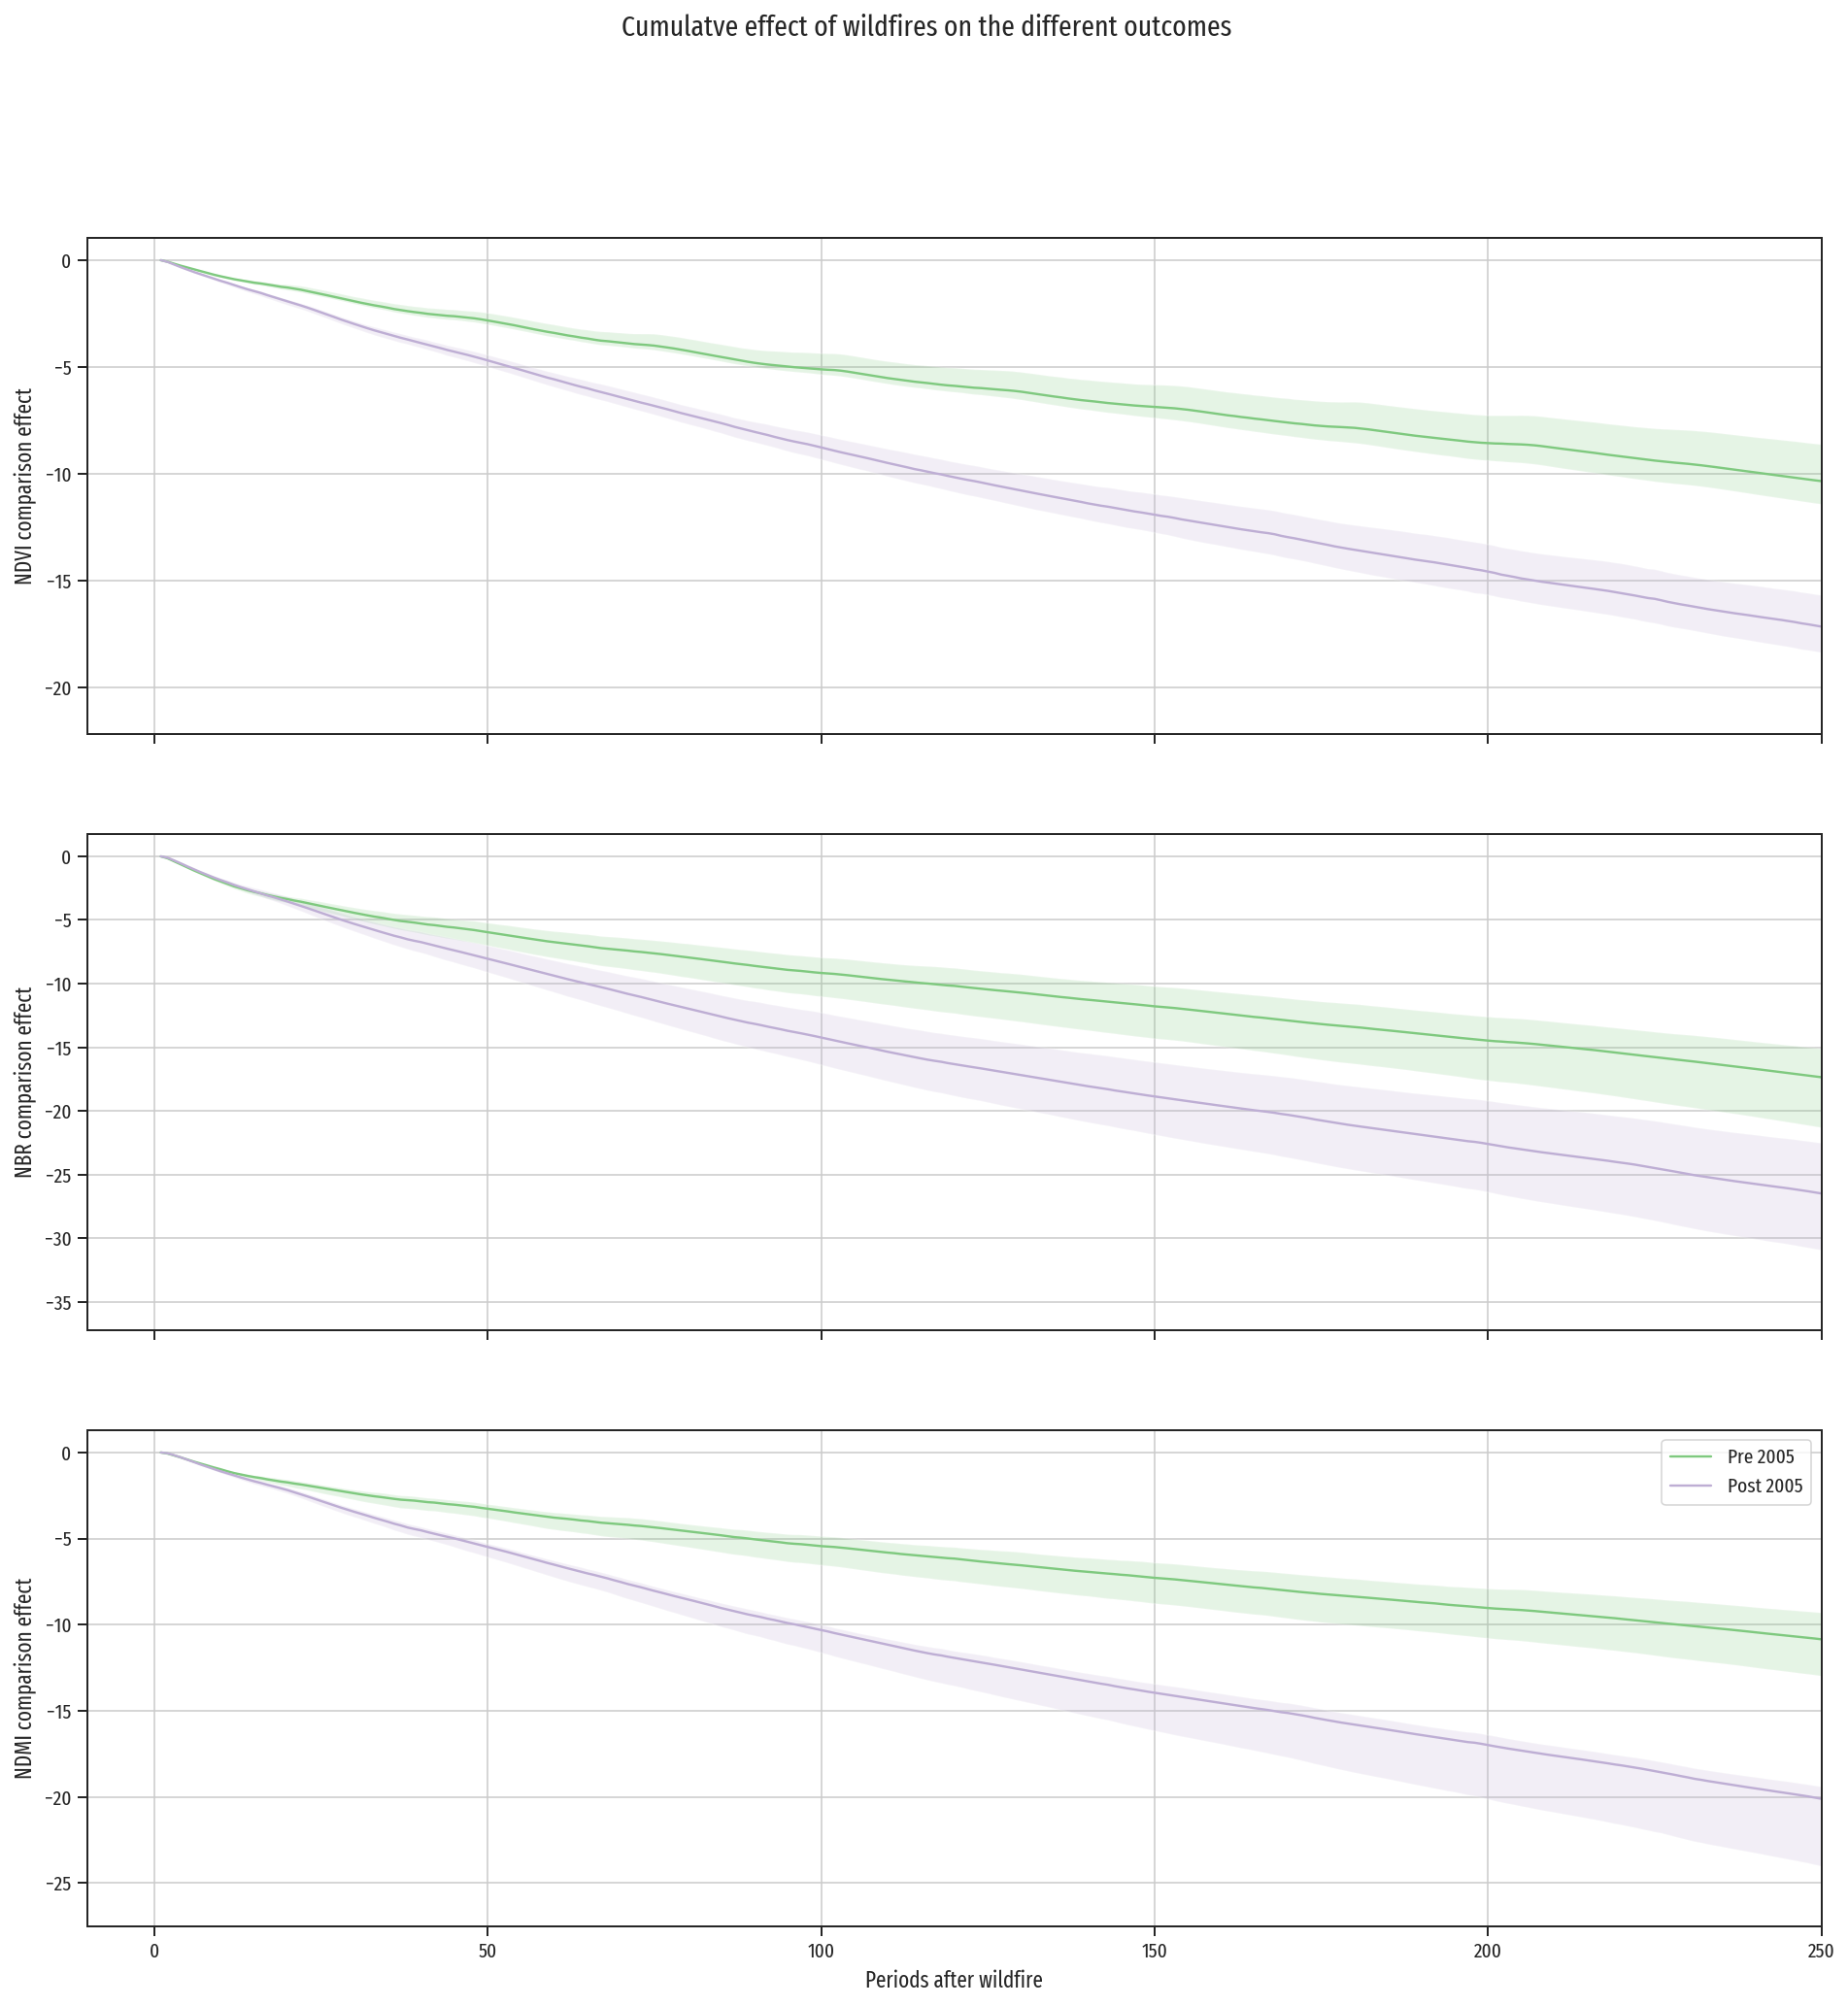

In [8]:
outcomes = ['ndvi', 'nbr','ndmi']

count = 0
fig, ax = plt.subplots(nrows=3, figsize=(16, 16), sharex=True)
for outcome_ in outcomes:
    df_ = df_time_gsynth[['variable_{}_time_<380_cum_att'.format(outcome_),
                          'variable_{}_time_<380_cum_lower'.format(outcome_),
                            'variable_{}_time_<380_cum_upper'.format(outcome_)]]
    df_['variable_{}_time_<380_cum_att'.format(outcome_)].plot(ax=ax[count])
    ax[count].fill_between(df_.index, 
                     df_['variable_{}_time_<380_cum_lower'.format(outcome_)], 
                     df_['variable_{}_time_<380_cum_upper'.format(outcome_)], 
                     alpha=.2)

    df_ = df_time_gsynth[['variable_{}_time_>379_cum_att'.format(outcome_), 
                          'variable_{}_time_>379_cum_lower'.format(outcome_),
                            'variable_{}_time_>379_cum_upper'.format(outcome_)]]
    df_['variable_{}_time_>379_cum_att'.format(outcome_)].plot(ax=ax[count])
    ax[count].fill_between(df_.index, 
                     df_['variable_{}_time_>379_cum_lower'.format(outcome_)],
                     df_['variable_{}_time_>379_cum_upper'.format(outcome_)], 
                     alpha=.2)

    ax[count].set(ylabel='{} comparison effect'.format(outcome_.upper()))
    ax[count].grid(True)
    plt.legend(['Pre 2005', 'Post 2005'])
    count += 1
ax[2].set_xlabel('Periods after wildfire')
plt.xlim([-10, 250])
plt.suptitle('Cumulatve effect of wildfires on the different outcomes', size=15)
plt.show()
fig.savefig(path_to_results+'Cumulative_ATT_effects_by_time_period.png',
        dpi=400,
        format='png',
        pil_kwargs={'compression':'tiff_lzw'})

In [9]:
df_time_gsynth.head()

variable_ndvi_time_<380_cum_att  variable_ndvi_time_<380_cum_SE  \
X1.379                                                                    
1                             -0.004781                        0.000755   
2                             -0.075843                        0.008303   
3                             -0.170523                        0.009729   
4                             -0.263510                        0.014596   
5                             -0.348955                        0.019323   

        variable_ndvi_time_<380_cum_lower  variable_ndvi_time_<380_cum_upper  \
X1.379                                                                         
1                               -0.005892                          -0.003756   
2                               -0.086308                          -0.062755   
3                               -0.183705                          -0.157186   
4                               -0.282354                          -0.244848   
5                               -0.377382                          -0.321286   

        variable_ndvi_time_<380_cum_pvalue  variable_ndvi_time_>379_cum_att  \
X1.379                                                                        
1                                      0.0                        -0.003048   
2                                      0.0                        -0.083681   
3                                      0.0                        -0.207980   
4                                      0.0                        -0.332608   
5                                      0.0                        -0.449412   

        variable_ndvi_time_>379_cum_SE  variable_ndvi_time_>379_cum_lower  \
X1.379                                                                      
1                             0.000978                          -0.005424   
2                             0.007388                          -0.094181   
3                             0.013611                          -0.233516   
4                             0.016918                          -0.363538   
5                             0.021673                          -0.493122   

        variable_ndvi_time_>379_cum_upper  variable_ndvi_time_>379_cum_pvalue  \
X1.379                                                                          
1                               -0.002525                                 0.0   
2                               -0.072691                                 0.0   
3                               -0.190479                                 0.0   
4                               -0.309731                                 0.0   
5                               -0.424029                                 0.0   

        ...  variable_nbr_time_<380_cum_att  variable_nbr_time_<380_cum_SE  \
X1.379  ...                                                                  
1       ...                       -0.008531                       0.003698   
2       ...                       -0.155611                       0.013381   
3       ...                       -0.396213                       0.018655   
4       ...                       -0.638231                       0.027427   
5       ...                       -0.880768                       0.040326   

        variable_nbr_time_<380_cum_lower  variable_nbr_time_<380_cum_upper  \
X1.379                                                                       
1                              -0.011199                         -0.000914   
2                              -0.181310                         -0.139571   
3                              -0.425654                         -0.376106   
4                              -0.685459                         -0.611692   
5                              -0.949449                         -0.838784   

        variable_nbr_time_<380_cum_pvalue  variable_nbr_time_>379_cum_att  \
X1.379                                                                      
1          

In [10]:
df_time_gsynth.shape

(379, 30)

In [11]:
df_time_gsynth.describe()

variable_ndvi_time_<380_cum_att  variable_ndvi_time_<380_cum_SE  \
count                       264.000000                      264.000000   
mean                         -6.036290                        0.478978   
std                           2.946393                        0.271351   
min                         -10.918134                        0.000755   
25%                          -8.534756                        0.246416   
50%                          -6.277143                        0.468909   
75%                          -3.761223                        0.690556   
max                          -0.004781                        1.273064   

       variable_ndvi_time_<380_cum_lower  variable_ndvi_time_<380_cum_upper  \
count                         264.000000                         264.000000   
mean                           -6.520568                          -5.125926   
std                             3.278461                           2.429812   
min                           -12.159488                          -9.062766   
25%                            -9.325749                          -7.236432   
50%                            -6.655298                          -5.340446   
75%                            -3.952859                          -3.334207   
max                            -0.005892                          -0.003756   

       variable_ndvi_time_<380_cum_pvalue  variable_ndvi_time_>379_cum_att  \
count                               264.0                       296.000000   
mean                                  0.0                       -11.142965   
std                                   0.0                         5.468633   
min                                   0.0                       -19.808677   
25%                                   0.0                       -15.722770   
50%                                   0.0                       -11.843540   
75%                                   0.0                        -6.808506   
max                                   0.0                        -0.003048   

       variable_ndvi_time_>379_cum_SE  variable_ndvi_time_>379_cum_lower  \
count                      296.000000                         296.000000   
mean                         0.563054                         -11.928949   
std                          0.313635                           5.864318   
min                          0.000978                         -21.153103   
25%                          0.284233                         -16.846289   
50%                          0.592322                         -12.672423   
75%                          0.840645                          -7.221007   
max                          1.095907                          -0.005424   

       variable_ndvi_time_>379_cum_upper  variable_ndvi_time_>379_cum_pvalue  \
count                         296.000000                               296.0   
mean                          -10.267430                                 0.0   
std                             4.945921                                 0.0   
min                           -18.085805                                 0.0   
25%                           -14.355991                                 0.0   
50%                           -10.910005                                 0.0   
75%                            -6.419824                                 0.0   
max                            -0.002525                                 0.0   

       ...  variable_nbr_time_<380_cum_att  variable_nbr_time_<380_cum_SE  \
count  ...                      264.000000                     264.000000   
mean   ...                      -10.575526                       1.191038   
std    ...                        4.591664                       0.588142   
min    ...                      -18.298540                       0.003698   
25%    ...                      -14.389658                       0.778463   
50%    ...                      -10.852825               

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


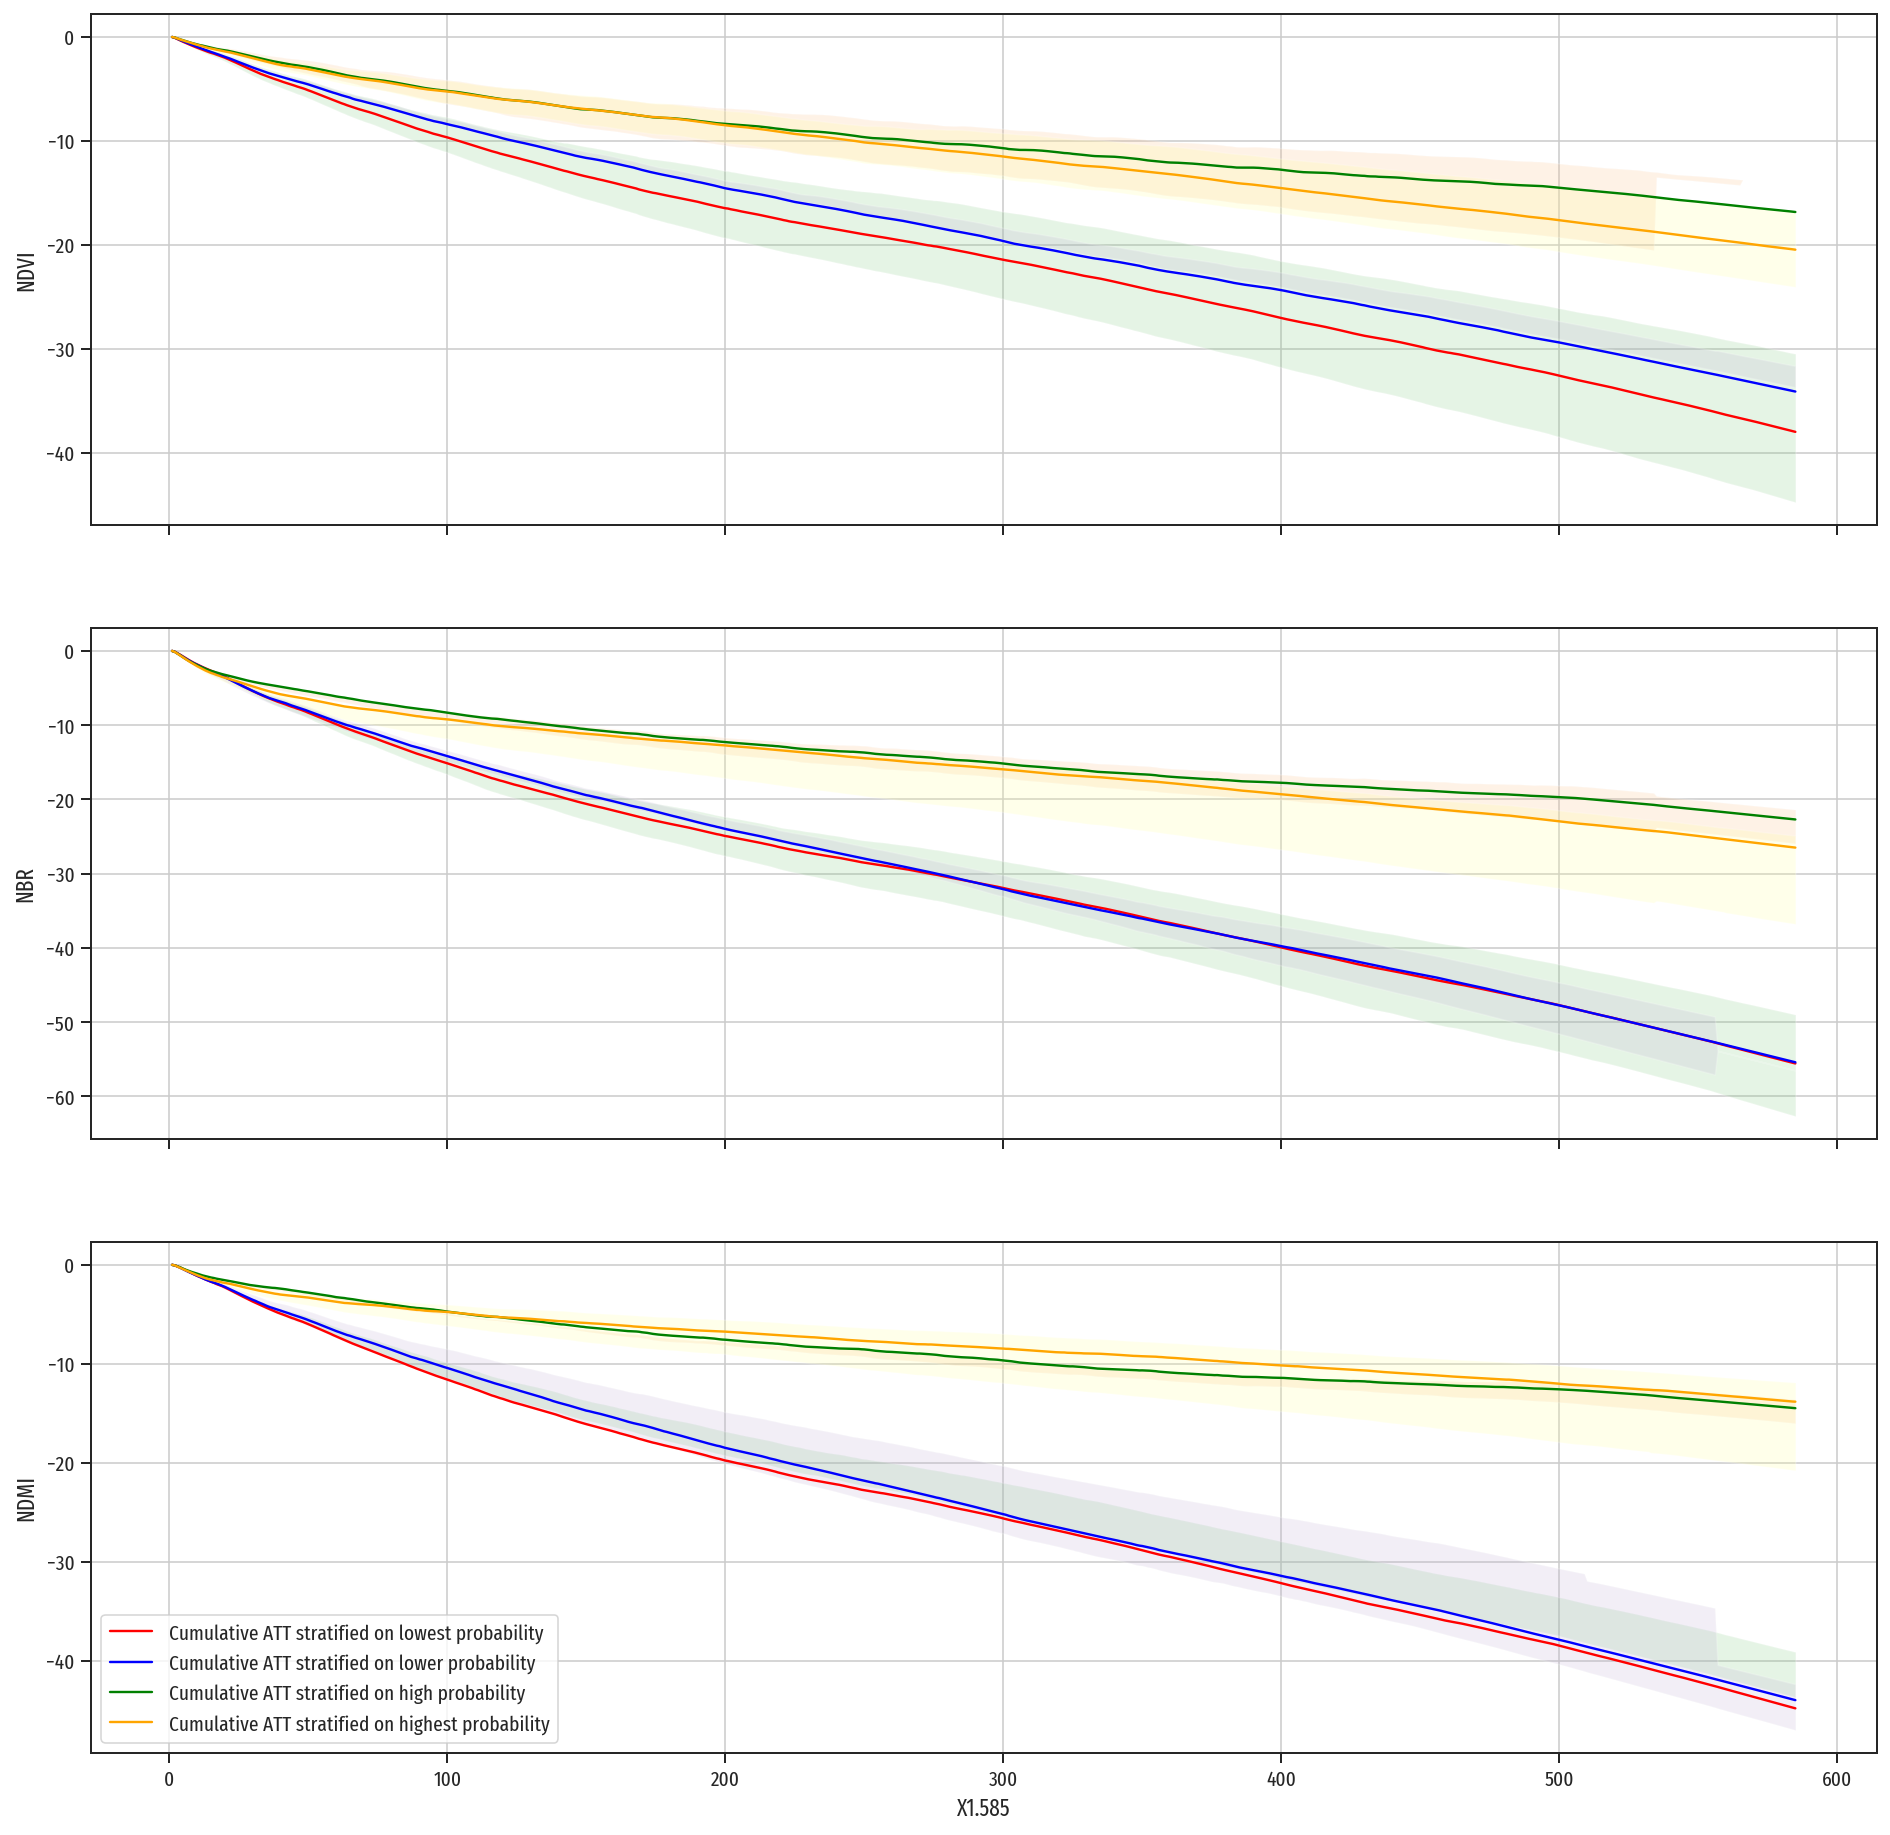

In [12]:
df_cumeffs_gsynth = read_csv('results/gsynth_results/postprocessed_data_cumeffs_control_group_0.csv', index_col=1)

import matplotlib.pyplot as plt
outcomes = ['ndvi', 'nbr','ndmi']

count = 0
fig, ax = plt.subplots(nrows=len(outcomes), figsize=(16, 16), sharex=True)
colors = ['red', 'blue', 'green', 'orange']
label_names = ['lowest probability', 'lower probability', 'high probability', 'highest probability']
for outcome_ in outcomes:
    for strat_ in ['0', '1', '2', '3']:
        df_ = df_cumeffs_gsynth[['{}_{}_cum_att'.format(outcome_, strat_),
                              '{}_{}_cum_lower'.format(outcome_, strat_),
                                '{}_{}_cum_upper'.format(outcome_, strat_)]]
        df_['{}_{}_cum_att'.format(outcome_, strat_)].plot(ax=ax[count], color=colors[int(strat_)],
                                                       label='Cumulative ATT stratified on '+label_names[int(strat_)])
        ax[count].fill_between(df_.index, 
                         df_['{}_{}_cum_lower'.format(outcome_, strat_)], 
                         df_['{}_{}_cum_upper'.format(outcome_, strat_)], 
                         alpha=.2)
        ax[count].set_ylabel('{}'.format(outcome_.upper()))
        ax[count].grid(True)
        plt.legend()

    count += 1
#plt.suptitle('Cumulatve effect of wildfires on the different outcomes', size=15)
plt.show()

fig.savefig(path_to_results+'Cumulative_ATT_effects.tiff',
        dpi=400,
        format='tiff',
        pil_kwargs={'compression':'tiff_lzw'})

In [13]:
df_time_atts = read_csv('results/gsynth_results/postprocessed_data_time_gsynth_non_cumeffs.csv', index_col=1)

df_time_atts.drop(columns=['Unnamed: 0']).head()

ndvi_1_<380_ct  ndvi_1_<380_tr  ndmi_1_<380_ct  ndmi_1_<380_tr  \
X1.379                                                                   
1             0.418132        0.419503        0.058886        0.060292   
2             0.395238        0.396519        0.039740        0.042346   
3             0.373456        0.373028        0.018416        0.015327   
4             0.358962        0.358608        0.011989        0.010282   
5             0.353752        0.352411       -0.000093       -0.000687   

        nbr_1_<380_ct  nbr_1_<380_tr  ndvi_1_>379_ct  ndvi_1_>379_tr  \
X1.379                                                                 
1            0.270483       0.271973        0.489209        0.491513   
2            0.244443       0.246307        0.485972        0.489680   
3            0.224546       0.221039        0.463914        0.464156   
4            0.216719       0.214219        0.467512        0.464751   
5            0.204893       0.204947        0.446532        0.446080   

        ndmi_1_>379_ct  ndmi_1_>379_tr  nbr_1_>379_ct  nbr_1_>379_tr  
X1.379                                                                
1             0.137619        0.138151       0.359104       0.360728  
2             0.148931        0.149914       0.366302       0.367410  
3             0.147553        0.148157       0.360022       0.360255  
4             0.159025        0.160191       0.371807       0.372670  
5             0.142610        0.144003       0.345362       0.344935

In [14]:
df_time_atts.shape

(379, 13)

In [15]:
df_time_atts[['ndvi_1_<380_ct','ndvi_1_<380_tr']].mean()

ndvi_1_<380_ct    0.34669
ndvi_1_<380_tr    0.32084
dtype: float64

In [16]:
df_time_atts[['ndvi_1_>379_ct','ndvi_1_>379_tr']].mean()

ndvi_1_>379_ct    0.515564
ndvi_1_>379_tr    0.469747
dtype: float64

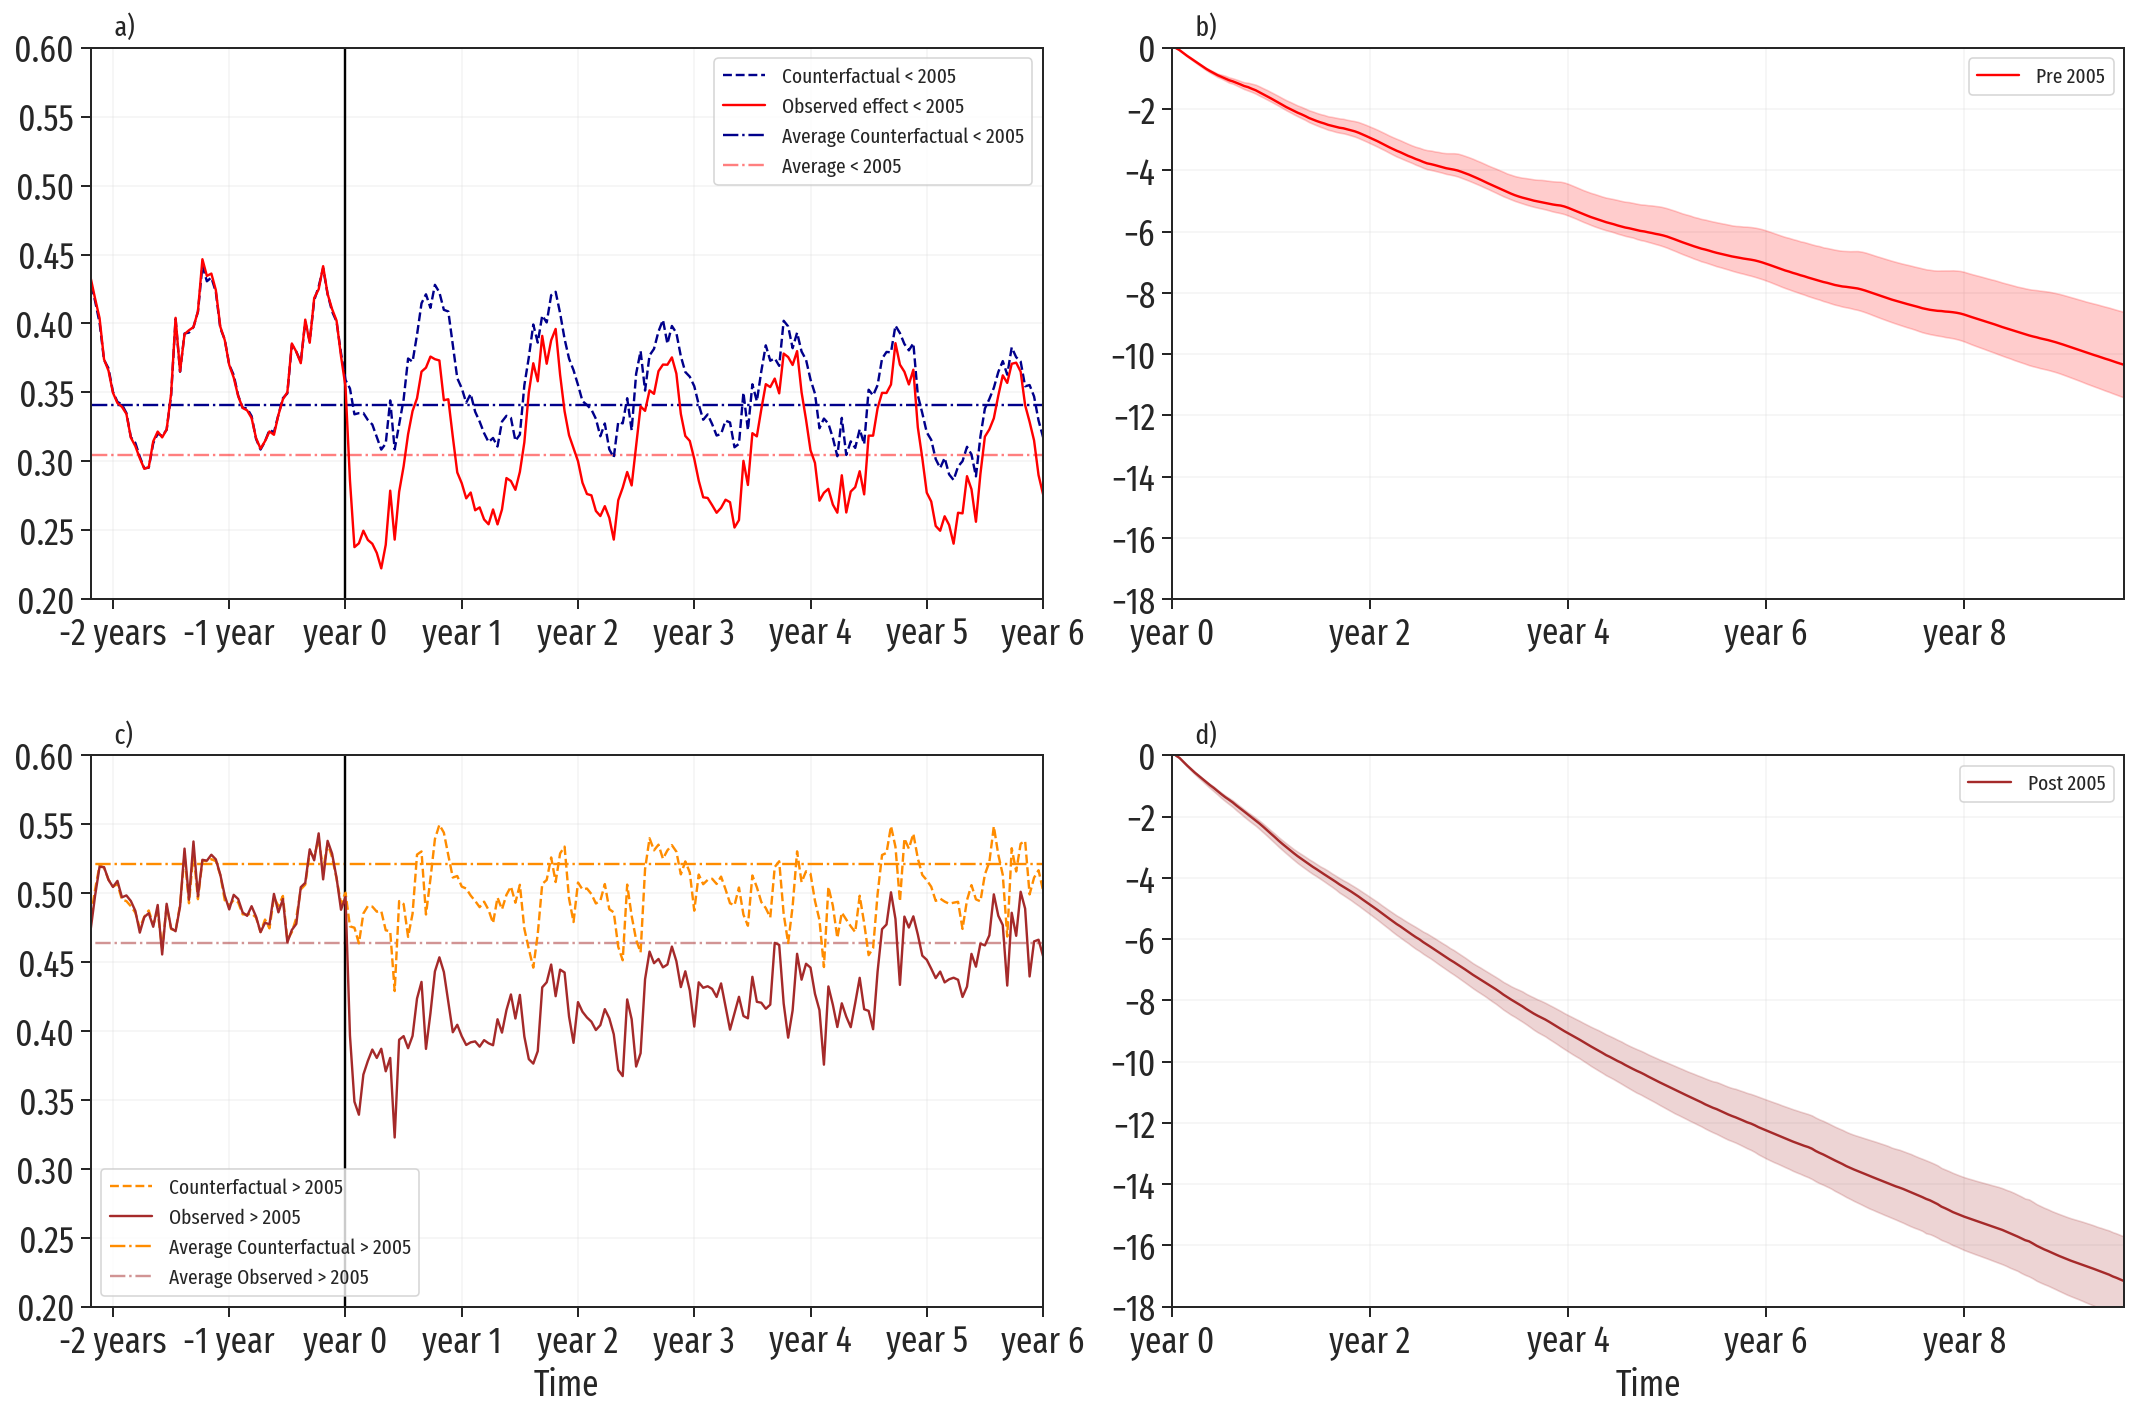

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
df_time_atts['ndvi_1_<380_ct'].to_frame().rename(
        columns={'ndvi_1_<380_ct':'Counterfactual < 2005'}).plot(ax=ax[0, 0], color='darkblue', linestyle='--')
ax[0, 0].hlines(df_time_atts['ndvi_1_<380_ct'].to_frame()[108:].mean(), 0, 250 + 26 * 2, 
           color='darkblue', linestyle='-.', label='Average Counterfactual < 2005')
df_time_atts['ndvi_1_<380_tr'].to_frame().rename(
        columns={'ndvi_1_<380_tr':'Observed effect < 2005'}).plot(ax=ax[0,0], color='red')
ax[0, 0].hlines(df_time_atts['ndvi_1_<380_tr'].to_frame()[108:].mean(), 0, 250 + 26 * 2, alpha=.5,
           color='red', linestyle='-.', label='Average < 2005')

ax[0, 0].vlines(108, 0.2, 0.6)
ax[0, 0].set_ylim([0.2, 0.6])
ax[0, 0].set_xlim([108-26*2-5, 108 + 26*6])
ax[0, 0].set_xlabel(' ')
ax[0, 0].set_xticks(range(108-26*2, 108+26*6+1, 26))
ax[0, 0].set_xticklabels(['-2 years', '-1 year', 'year 0', 'year 1', 'year 2', 'year 3', 'year 4', 'year 5', 'year 6'])
ax[0, 0].legend()
ax[0, 0].grid(True, alpha=.2)

df_time_atts['ndvi_1_>379_ct'].to_frame().rename(
        columns={'ndvi_1_>379_ct':'Counterfactual > 2005'}).plot(ax=ax[1, 0], color='darkorange', linestyle='--')
ax[1, 0].hlines(df_time_atts['ndvi_1_>379_ct'].to_frame()[73:].mean(), 0, 250, color='darkorange', linestyle='-.', 
           label='Average Counterfactual > 2005')
df_time_atts['ndvi_1_>379_tr'].to_frame().rename(
        columns={'ndvi_1_>379_tr':'Observed > 2005'}).plot(ax=ax[1, 0], color='brown')
ax[1, 0].hlines(df_time_atts['ndvi_1_>379_tr'].to_frame()[73:].mean(), 0, 250, color='brown', linestyle='-.', alpha=.5,
          label='Average Observed > 2005')
ax[1, 0].vlines(73, 0.2, 0.6)
ax[1, 0].set_ylim([0.2, 0.6])
ax[1, 0].set_xlim([73-26*2-5, 73 + 26*6])
ax[1, 0].set_xlabel('Time')
ax[1, 0].set_xticks(range(73-26*2, 73+26*6+1, 26))
ax[1, 0].set_xticklabels(['-2 years', '-1 year', 'year 0', 'year 1', 'year 2', 'year 3', 'year 4', 'year 5', 'year 6'])
ax[1, 0].grid(True, alpha=.2)
ax[1, 0].legend()

outcome_ = 'ndvi'
df_ = df_time_gsynth[['variable_{}_time_<380_cum_att'.format(outcome_),
                      'variable_{}_time_<380_cum_lower'.format(outcome_),
                        'variable_{}_time_<380_cum_upper'.format(outcome_)]]
df_['variable_{}_time_<380_cum_att'.format(outcome_)].plot(ax=ax[0, 1], color='red')
ax[0, 1].fill_between(df_.index, 
                 df_['variable_{}_time_<380_cum_lower'.format(outcome_)], 
                 df_['variable_{}_time_<380_cum_upper'.format(outcome_)], 
                 alpha=.2, color='red')
ax[0, 1].grid(True, alpha=.2)
ax[0, 1].set_ylim([-18, 0])
ax[0, 1].set_xlim([0, 250])
ax[0, 1].set_xlabel(' ')
ax[0, 1].set_xticks(range(0, 250, 26*2))
ax[0, 1].legend(['Pre 2005'])
ax[0, 1].set_xticklabels(['year {}'.format(i) for i in range(0, 10, 2)])

df_ = df_time_gsynth[['variable_{}_time_>379_cum_att'.format(outcome_), 
                      'variable_{}_time_>379_cum_lower'.format(outcome_),
                        'variable_{}_time_>379_cum_upper'.format(outcome_)]]
df_['variable_{}_time_>379_cum_att'.format(outcome_)].plot(ax=ax[1, 1], color='brown')
ax[1, 1].fill_between(df_.index, 
                 df_['variable_{}_time_>379_cum_lower'.format(outcome_)],
                 df_['variable_{}_time_>379_cum_upper'.format(outcome_)], 
                 alpha=.2, color='brown')

#ax[1, 1].set(ylabel='{} comparison effect'.format(outcome_.upper()))
ax[1, 1].grid(True, alpha=.2)
ax[1, 1].legend(['Post 2005'])
ax[1, 1].set_ylim([-18, 0])
ax[1, 1].set_xlim([0, 250])
ax[1, 1].set_xticks(range(0, 250, 26*2))
ax[1, 1].set_xticklabels(['year {}'.format(i) for i in range(0, 10, 2)])
ax[1, 1].set_xlabel('Time')

ax[0, 0].set_title('    a)', loc='left', fontsize=14, fontweight='bold')
ax[1, 0].set_title('    c)', loc='left', fontsize=14, fontweight='bold')

ax[0, 1].set_title('    b)', loc='left', fontsize=14, fontweight='bold')
ax[1, 1].set_title('    d)', loc='left', fontsize=14, fontweight='bold')
for _row in range(2):
    for _col in range(2):        
        for item in ([ax[_row, _col].title, ax[_row, _col].xaxis.label, ax[_row, _col].yaxis.label] +
                     ax[_row, _col].get_xticklabels() + ax[_row, _col].get_yticklabels()):
            item.set_fontsize(18)

plt.tight_layout()
plt.show()

fig.savefig(path_to_results+'ATT_effects_by_time_period.png',
        dpi=400,
        format='png',
        pil_kwargs={'compression':'tiff_lzw'})
